# William Fung
# Gravitational N-body Simulation

## Modules

In [1]:
# Python
from datetime import datetime

# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt
import copy

# NumPy
import numpy        as np
import numpy.random as random
from numpy import cos, exp, log, pi, sin, sqrt

## Initial Conditions

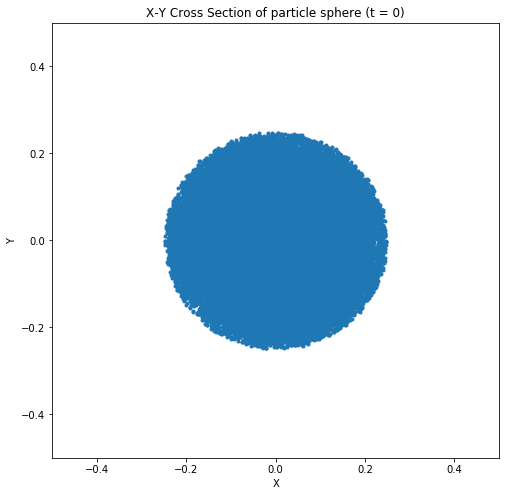

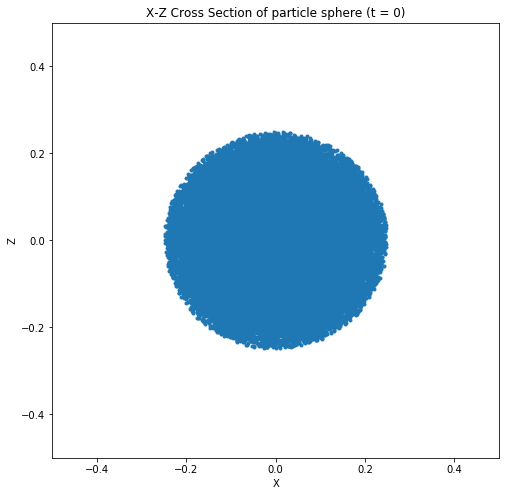

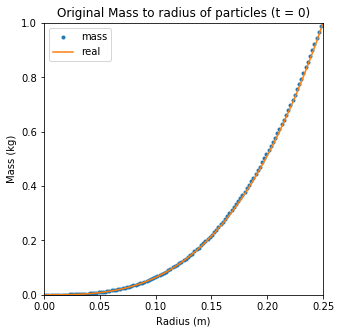

In [228]:
G = 6.67e-11 #m^3kg^-1s^-2

#Length of Grid (m)
L = 1

#Number of cells
Nc = 128

#Number of particles
Np = 32**3

#Mass of particle (kg)
m = .1

#Sphere 
Ms = m*Np #kg
Rs = L/4  #m

# r = (3*u)**(1/3)/3**(1/3)*Rs
# print(u, r)

#Initialize Particles
part = np.zeros((Np, 9))
#     x  y  z  vx vy vz ax ay az
# 0 [[0. 0. 0. 0. 0. 0. 0. 0. 0.]
# 1  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
# 2  [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
# ...
#print(part)
def particles(part):
    Np = len(part)
    partpos = np.zeros((3, Np))
    
    dr = L/Nc
    N = int(1/dr + 1)
    resultR = np.zeros(N)
    
    for i in range(Np):
        # 0 < u < 1
        u = random.rand()
        
        ###Transformation Method
        #Uniform Deviate 0 < u < 1
        # p(u)du = p(r)dr
        # (1) du = r^2 dr
        # u = (1/3)r^3
        # 0 < r < 3^(1/3)
        # 0 < r < R
        r = (3*u)**(1/3)/3**(1/3)*Rs
        #print(r)
        
        # p(u)du = p(theta)dtheta
        # (1) du = sin(theta) dtheta
        # u = -cos(theta)
        # theta = arccos(-u)
        # arccos takes in -1 to 1 and goes from pi to 0
        # 0 < theta < pi
        u = random.rand()
        #print(u)
        theta = np.arccos((u - .5)*2)
        #print(theta)
        
        # p(u)du = p(phi)phi
        # (1) du = (1) dphi
        # u = phi
        # 0 < phi < 2pi
        phi = abs(random.rand())*2*np.pi
        #print(phi)
        
        #Spherical Coordinates
        xpos = r*np.sin(theta)*np.cos(phi)
        ypos = r*np.sin(theta)*np.sin(phi)
        zpos = r*np.cos(theta)

        part[i][0] = xpos
        part[i][1] = ypos
        part[i][2] = zpos
        
        partpos[0][i] = xpos
        partpos[1][i] = ypos
        partpos[2][i] = zpos
        
        resultR[round(r/.25*(N - 1))] += m
    
    #print(resultR)
    resRconst = copy.deepcopy(resultR)
    for ni in range(N):
        #print(resRconst)
        sumbef = sum(resRconst[:ni])
        resultR[ni] += sumbef

    return part, partpos, resultR

part = particles(part)
part1 = part[0]
part2 = part[1]
part3 = part[2]
# maxx = max(ppos[1])
# print(maxx)
#print(part1)
#print(part2)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.plot(part2[0], part2[1], '.')
ax.axis([-0.5, 0.5, -0.5, 0.5])
ax.set_title('X-Y Cross Section of particle sphere (t = 0)')
ax.set_xlabel('X')
ax.set_ylabel('Y')

fig1 = plt.figure(figsize=(8,8))
ax1 = fig1.add_subplot(111)
ax1.plot(part2[0], part2[2], '.')
ax1.axis([-0.5, 0.5, -0.5, 0.5])
ax1.set_title('X-Z Cross Section of particle sphere (t = 0)')
ax1.set_xlabel('X')
ax1.set_ylabel('Z')

#plot M(<r) to r to check if have a curve of r^3
# M(<r)/Ms = (r/Rs)**3

dr = L/Nc
N = int(1/dr + 1)
x = np.linspace(0, Rs, N)
f = (x/Rs)**3

#print(part3, Ms)
partR = part3/Ms

fig2 = plt.figure(figsize=(5,5))
ax2 = fig2.add_subplot(111)
ax2.plot(x, partR, '.', label = 'mass')
ax2.plot(x, f, label = 'real')
ax2.axis([0, Rs, 0, 1])
ax2.set_title('Original Mass to radius of particles (t = 0)')
ax2.set_xlabel('Radius (m)')
ax2.set_ylabel('Mass (kg)')
ax2.legend()

plt.show()


# Cloud in Cell for Density

In [229]:
#print(part2)

#Volume of a cell (m)
Vc = (1/Nc)**3

#Radius of a cell (m)
rc = (1/Nc)/2

#Cartesian mesh grid
#rho(x)
def density(part2):
    #print(part2)
    Np = len(part2[0])
    #print(Np)
    result = np.zeros((Nc, Nc, Nc))
    for i in range(Np):
        xp = abs(part2[0][i] + .5)
        yp = abs(part2[1][i] + .5)
        zp = abs(part2[2][i] + .5)

        #wrap around function
        if np.round(xp*Nc) >= Nc:
            print(1, xp)
            xp -= L
            print(1, xp)
        if np.round(yp*Nc) >= Nc:
            print(2, yp)
            yp -= L
            print(2, yp)
        if np.round(zp*Nc) >= Nc:
            print(3, zp)
            zp -= L
            print(3, zp)
        
        #All six points
        xi, yi, zi = np.round(xp*Nc)/Nc, np.round(yp*Nc)/Nc, np.round(zp*Nc)/Nc
        xiter, yiter, ziter = abs(xi*Nc), abs(yi*Nc), abs(zi*Nc)
        #print(xp, yp, zp, xi, yi, zi, xiter, yiter, ziter)
        
        x1, y1, z1 = xp + rc, yi,     zi
        x2, y2, z2 = xi,     yi,     zp - rc
        x3, y3, z3 = xi,     yp - rc, zi
        x4, y4, z4 = xp - rc, yi,     zi
        x5, y5, z5 = xi,     yi,     zp + rc
        x6, y6, z6 = xi,     yp + rc, zi
        
        L1, L2, L3 = abs(x1 - xi), abs(z2 - zi), abs(y3 - yi)
        L4, L5, L6 = abs(x4 - xi), abs(z5 - zi), abs(y6 - yi)
        
        V1, V2, V3, V4 = L1*L2*L3, L4*L2*L3, L4*L5*L3, L5*L1*L3
        V5, V6, V7, V8 = L1*L2*L6, L4*L2*L6, L4*L5*L6, L5*L1*L6
        #print(V1, V2, V3, V4, V5, V6, V7, V8)
        #Mtot = sum(density*Vc) = Ms = mpart*Npart
        #print(i, (V1 + V2 + V3 + V4 + V5 + V6 + V7 + V8)/V) #sum equals 1
        
        
        result[int(xiter)][int(yiter - 1)][int(ziter - 1)] += V1/Vc*m
        result[int(xiter - 1)][int(yiter - 1)][int(ziter - 1)] += V2/Vc*m
        result[int(xiter - 1)][int(yiter - 1)][int(ziter)] += V3/Vc*m
        result[int(xiter)][int(yiter - 1)][int(ziter)] += V4/Vc*m
        result[int(xiter)][int(yiter)][int(ziter - 1)] += V5/Vc*m
        result[int(xiter - 1)][int(yiter)][int(ziter - 1)] += V6/Vc*m
        result[int(xiter - 1)][int(yiter)][int(ziter)] += V7/Vc*m
        result[int(xiter)][int(yiter)][int(ziter)] += V8/Vc*m
        #print(result[int(xiter)][int(yiter)])
        
    return result

#rho = mass/vol
rhox = density(part2)/Vc
#print(rhox[50][50])

#FFT of rho(x) to get rho(k)
rhok = np.fft.rfftn(rhox) 
Ni, Nj, Nk = rhok.shape
#print(Ni, Nj, Nk)
#128, 128, 65 <--- positive wave vectors

#print(den)
#print(den[39][50])

#fvec += fij

# Poisson's Equation

In [230]:

### Poisson's Equation
# del^2 phi(x) = 4*pi*G*rho(x)

# The general solution is a convlution:
# phi(x) = integral(rho(x')*w(|x - x'|))dx'

# ---> phi(k) = rho(k)*w(k)
# phi(x) = np.fft.irfftn(phik)
# phi.shape: 128, 128, 128

###Wavenumber function
#Input for kx, ky, kz
def wavenum(x): 
    N = x
    mid = N//2 + 1
    result = np.zeros(N)
    for k in range(N):
        if k < mid:
            result[k] += 2*pi*k/Nc
        else:
            result[k] += 2*pi*(k - N)/Nc
    return result

#Produces wavenumber array for three dimensions
def wavexyz(Ni, Nj, Nk):
    #print(Ni, Nj, Nk)
    wavex = wavenum(Ni)
    wavey = wavenum(Nj)
    wavez = wavenum(Nk)
    #print(wavex, wavey, wavez)
    return np.array([wavex, wavey, wavez])

### Gravitational Kernel:
def w(wave):
    #print(k[0])
    result = np.zeros([Ni, Nj, Nk])
    for i in range(Ni):
        for j in range(Nj):
            for k in range(Nk):
                x = 2*np.sin(wave[0][i]/2)
                y = 2*np.sin(wave[1][j]/2)
                z = 2*np.sin(wave[2][k]/2)
                if x == 0 and y == 0 and z == 0:
                    result[i][j][k] = 0
                else:
                    #print(x,y,z)
                    result[i][j][k] = -4*np.pi*G/(x**2 + y**2 + z**2)
    return result

wk = w(wavexyz(Ni, Nj, Nk))

phik = rhok * wk
#print(phik)

###Gravitational Potential
phix = np.fft.irfftn(phik)
#print(phix)

Npi, Npj, Npk = rhox.shape

#print(Npi, Npj, Npk)


# Cloud in Cell for Gravitational Force

In [231]:
#vectorf = -grad(phix)
def gradient(phix):
    h = L/Nc
    resultx = np.zeros([Nc, Nc, Nc])
    resulty = np.zeros([Nc, Nc, Nc])
    resultz = np.zeros([Nc, Nc, Nc])
    for x in range(Nc):
        for y in range(Nc):
            for z in range(Nc):
                if z + 1 == Nc or y + 1 == Nc or x + 1 == Nc:
                    resultx[x, y, z] = -(phix[x, y, z] - phix[x - 2, y, z])/(2*h)
                    resulty[x, y, z] = -(phix[x, y, z] - phix[x, y - 2, z])/(2*h)
                    resultz[x, y, z] = -(phix[x, y, z] - phix[x, y, z - 2])/(2*h)
                else:
                    resultx[x, y, z] = -(phix[x + 1, y, z] - phix[x - 1, y, z])/(2*h)
                    resulty[x, y, z] = -(phix[x, y + 1, z] - phix[x, y - 1, z])/(2*h)
                    resultz[x, y, z] = -(phix[x, y, z + 1] - phix[x, y, z - 1])/(2*h)
    return np.array((resultx, resulty, resultz))

#(L/N) correction from one particle test (See below)
fvector = gradient(phix)*(L/Nc)
#print(len(fvector[0][0][0]))
#print(fvector)

#Check:
#print(np.gradient(phix))

#Volume of a cell (m)
Vc = (1/Nc)**3

#Radius of a cell (m)
rc = (1/Nc)/2

#Cartesian mesh grid for force per unit mass
def force(part2, fvector):
    Np = len(part2[0])
    result = np.zeros((Np, 3))
    count = 0
    for n in range(3): #0:x; 1:y; 2:Z
        fndir = fvector[n]
        for i in range(Np):
            xp = abs(part2[0][i] + .5)
            yp = abs(part2[1][i] + .5)
            zp = abs(part2[2][i] + .5)
            
            #wrap around function
            if np.round(xp*Nc) >= Nc:
                #print(1, xp)
                xp -= L
                #print(1, xp)
            if np.round(yp*Nc) >= Nc:
                #print(2, yp)
                yp -= L
                #print(2, yp)
            if np.round(zp*Nc) >= Nc:
                #print(3, zp)
                zp -= L
                #print(3, zp)

            #All six points
            xi, yi, zi = np.round(xp*Nc)/Nc, np.round(yp*Nc)/Nc, np.round(zp*Nc)/Nc
            xiter, yiter, ziter = xi*Nc, yi*Nc, zi*Nc
            #print(xp, yp, zp, xi, yi, zi, xiter, yiter, ziter)
                
            x1, y1, z1 = xp + rc, yi,     zi
            x2, y2, z2 = xi,     yi,     zp - rc
            x3, y3, z3 = xi,     yp - rc, zi
            x4, y4, z4 = xp - rc, yi,     zi
            x5, y5, z5 = xi,     yi,     zp + rc
            x6, y6, z6 = xi,     yp + rc, zi

            L1, L2, L3 = abs(x1 - xi), abs(z2 - zi), abs(y3 - yi)
            L4, L5, L6 = abs(x4 - xi), abs(z5 - zi), abs(y6 - yi)

            V1, V2, V3, V4 = L1*L2*L3, L4*L2*L3, L4*L5*L3, L5*L1*L3
            V5, V6, V7, V8 = L1*L2*L6, L4*L2*L6, L4*L5*L6, L5*L1*L6
            #Mtot = sum(density*Vc) = Ms = mpart*Npart
            #print(i, (V1 + V2 + V3 + V4 + V5 + V6 + V7 + V8)/Vc) #sum equals 1
            
            f1 = fndir[int(xiter)][int(yiter - 1)][int(ziter - 1)]
            f2 = fndir[int(xiter - 1)][int(yiter - 1)][int(ziter - 1)]
            f3 = fndir[int(xiter - 1)][int(yiter - 1)][int(ziter)]
            f4 = fndir[int(xiter)][int(yiter - 1)][int(ziter)]
            f5 = fndir[int(xiter)][int(yiter)][int(ziter - 1)]
            f6 = fndir[int(xiter - 1)][int(yiter)][int(ziter - 1)]
            f7 = fndir[int(xiter - 1)][int(yiter)][int(ziter)]
            f8 = fndir[int(xiter)][int(yiter)][int(ziter)]
            
            result[i][n] += V1/Vc*f1 + V2/Vc*f2 + V3/Vc*f3 + V4/Vc*f4 + V5/Vc*f5 + V6/Vc*f6 + V7/Vc*f7 + V8/Vc*f8
            
#             if count == 0:
#                 ax = fvector[0][int(xiter)][int(yiter)][int(ziter)]
#                 ay = fvector[1][int(xiter)][int(yiter)][int(ziter)]
#                 az = fvector[2][int(xiter)][int(yiter)][int(ziter)]
#                 a = (ax**2 + ay**2 + az**2)**(1/2)
#                 resultAcc[i] = a
            
#         count += 1
        
    return result

#fx = force per unit mass field (units of acceleration)
fx = force(part2, fvector)*(L/Nc)**2
# fx0 = fx
# fx1 = fx[1]
# #print(fx0[0][73][73])
# print(fx0)


# One Particle Test

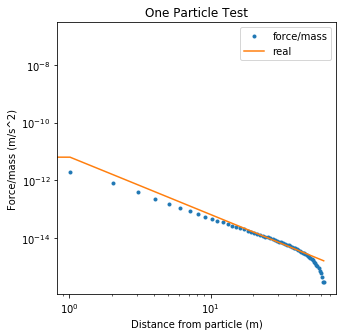

In [71]:
#####Create a new particle near the center of the mesh:

###Particle Initialization
# onepart = np.array([[.005, -.005, .005, 0,0,0, 0,0,0]])
# #print(onepart)
# onepart = particles(onepart)
# onepart1 = onepart[0]
# onepart2 = onepart[1]
# onepart3 = onepart[2]
# #print(onepart2)
onepart = np.array([[.005],
                    [-.005],
                    [.005]])

###Density mesh
onerhox = density(onepart)/Vc
#print(onerhox[58][39])

###rhok
#FFT of rho(x) to get rho(k)
onerhok = np.fft.rfftn(onerhox) 
Ni, Nj, Nk = rhok.shape
#print(Ni, Nj, Nk)
#print(onerhok)

###wk (don't need to do this again; should be the same)
onewk = w(wavexyz(Ni, Nj, Nk))

###phik
onephik = onerhok * onewk
#print(onephik)

###phix
onephix = np.fft.irfftn(onephik)
Npi, Npj, Npk = onerhox.shape
#print(phix)

###force/unit mass
onefvector = gradient(onephix)
#print(onefvector)

#fx = force per unit mass field (units of acceleration)
#onefx = force(onepart2, onefvector)
#print(onefx)

def onepartest(part2, fvector):
    
    dr = 1/Nc
    xp = part2[0][0] + .5
    yp = part2[1][0] + .5
    zp = part2[2][0] + .5
    
    #All six points
    xi, yi, zi = np.round(xp*Nc)/Nc, np.round(yp*Nc)/Nc, np.round(zp*Nc)/Nc
    xiter, yiter, ziter = xi*Nc, yi*Nc, zi*Nc
    #print(xp, yp, zp, xi, yi, zi, xiter, yiter, ziter)

    N  = int(1/dr)
    Nr = int(N - xiter)
    #print(Nr)
    
    resultR = np.zeros(Nr)
    
    #Since field is (supposedly) evenly distributed, can choose one direction to plot x-axis:
    for i in range(Nr):
        fx = fvector[0][int(xiter + i)][int(yiter)][int(ziter)]
        fy = fvector[1][int(xiter + i)][int(yiter)][int(ziter)]
        fz = fvector[2][int(xiter + i)][int(yiter)][int(ziter)]
        #print(i, xiter + i)#fx, fy, fz)
        f = (fx**2 + fy**2 + fz**2)**(1/2)
        #print(i, f)
        #resultR[int(abs(xp - .5)/.25*N)] += f
        resultR[i] += f
    
    x = np.linspace(0, Nr, Nr)
    f = G*m/(x + dr)**2
    
    return resultR, x, f


#Plot force per unit mass (x-direction) to radius of particle
onefx  = onepartest(onepart, onefvector)
fx1 = onefx[0]*(L/Nc)**3.9
x = onefx[1]
f = onefx[2]
#print(fx1)

fig3 = plt.figure(figsize=(5,5))
ax3 = fig3.add_subplot(111)
ax3.plot(x, fx1, '.', label = 'force/mass')
ax3.plot(x, f, label = 'real')
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_title('One Particle Test')
ax3.set_xlabel('Distance from particle (m)')
ax3.set_ylabel('Force/mass (m/s^2)')
ax3.legend()

plt.show()

# Cold Gravitational Collapse (Verlet Method)

0.019437992400824534
0.02904874942186978
0.03845127974115121
0.04772477261577541
t at 5 percent dynamical time
0.05687554751531191
0.06590846124678383
0.07482816866006226
0.08363930386457802
0.09234633840663603
0.10095334971126992
t at 10 percent dynamical time
0.1094639051686133
0.11788111585299933
0.12620787444000514
0.13444707324850438
0.14260157758210332
0.15067407724293422
t at 15 percent dynamical time
0.1586670164517744
0.166582662137806
0.17442318836812776
0.1821907221942709
0.18988318397867884
0.1975016978797667
t at 20 percent dynamical time
0.20504837988759633
0.21252143285109704
0.21991738208284767
0.2272385540054139
0.2344871580964748
0.2416653243112107
0.24877507833015558
t at 25 percent dynamical time
0.25581831648933173
0.2627968354798454
0.2697123810805489
0.27656665838715655
0.2833612870577109
0.2900977996265576
0.2967776665406299
t at 30 percent dynamical time


/Users/GrandmasterFung/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:158: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/GrandmasterFung/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:166: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/GrandmasterFung/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:174: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory.

0.30340229804710694
0.30997302708310487
0.316455510733988
0.32284850741284665
0.3291555769807252
0.3353800376035415
0.3415250194871056
0.347532710128652
t at 35 percent dynamical time
0.3533781004023375
0.3590736864384506
0.3640434061140126
0.3683890923422514
0.37221505149536543
0.3756388030548483
0.37874219054904434
0.38159168016525924
0.38423812152379344
0.386717839540101
0.38905782839550623
0.39127895287837683
0.39339769215896936
0.39542717276618705
t at 40 percent dynamical time
0.39737793303770247
0.39925855065403615
0.40107611198718496
0.4028365839124012
0.4045450651384925
0.4062059419118145
0.40782302298105244
0.40939964772997717
0.4109387465900391
0.4124428996099689
0.4139143919124015
0.4153552466630131
0.4167672666763214
0.4181520765902039
0.4195111482284647
0.4208458160681587
0.42215729657235246
0.42344670549299185
0.42471507265731917
0.4259633554238867
0.42719244508459436
0.4284031656412264
0.42959627846037257
0.4307724929582592
0.4319324724404481
0.4330768331993814
0.434206

0.6949583864117569
0.6956268412062174
t at 70 percent dynamical time
0.6962952911454701
0.6969637343185002
0.6976321707976295
0.6983006006536027
0.6989690239539074
0.6996374407626269
0.7003058511401478
0.7009742551432413
0.7016426528244935
0.702311044232165
0.7029794294095862
0.7036478083912817
0.7043161812006197
0.7049845478500594
0.7056529083418847
0.7063212626708093
0.7069896108269641
0.7076579527983932
0.7083262885721255
0.7089946181339213
0.709662941469227
0.7103312585643529
0.7109995694064826
0.7116678739836069
0.712336172286136
0.7130044643079833
0.7136727500455476
0.7143410294980851
0.7150093026699664
0.7156775695711538
0.7163458302139221
0.717014084610955
0.717682332776091
0.7183505747238997
0.7190188104663279
0.7196870400129651
0.7203552633714022
0.721023480546174
0.7216916915399381
0.722359896353605
0.7230280949882324
0.7236962874452034
0.7243644737239612
0.7250326538226544
0.7257008277390201
0.7263689954699561
0.7270371570120504
0.7277053123620796
0.7283734615176893
0.72904

0.9626732051456761
0.9631162945777274
0.9635587476712605
0.9640005917935531
0.9644418529279178
0.9648825558741744
0.9653227243793951
0.9657623812049415
0.9662015482008158
0.9666402462919051
0.9670784954575299
0.9675163148010966
0.9679537226544506
0.9683907366102602
0.9688273735257348
0.9692636495241974
0.9696995800129484
0.9701351797456611
0.970570462864374
0.971005442921035
0.9714401328893794
0.9718745451697121
0.9723086915762644
0.9727425833048042
0.9731762309293492
0.9736096444231755
0.9740428331203861
0.9744758057036421
0.9749085702306307
0.9753411341457997
0.9757735043063144
0.9762056870334807
0.9766376881843568
0.977069513215175
0.9775011672148033
0.9779326549556099
0.9783639809393894
0.978795149404764
0.9792261643471655
0.9796570295485321
0.980087748605044
0.980518324949917
0.9809487618711851
0.9813790625255687
0.9818092299464426
0.9822392670473175
0.9826691766343982
0.9830989614262982
0.9835286240647616
0.9839581671159807
0.9843875930867827
0.9848169044337786
0.9852461035612513

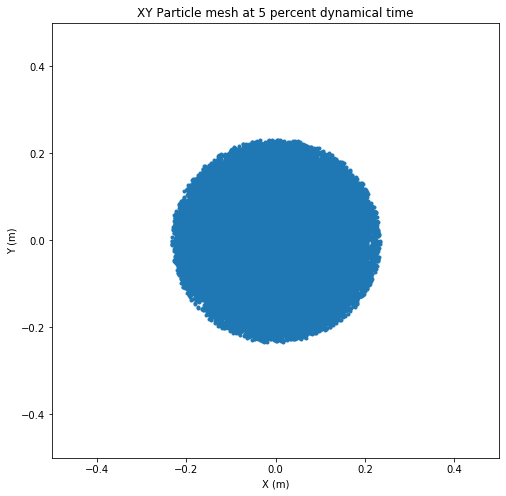

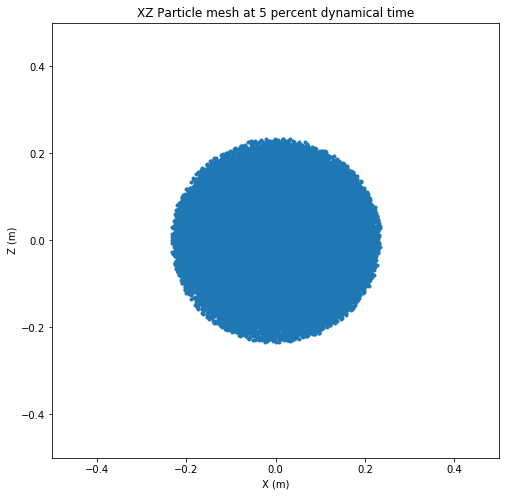

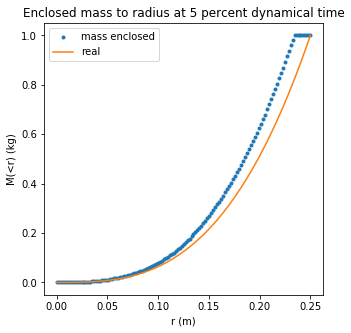

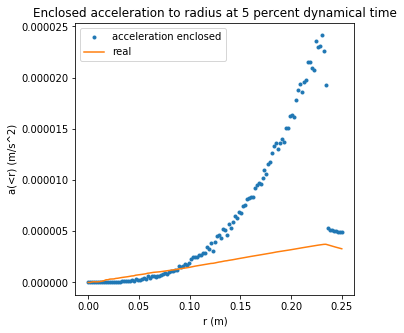

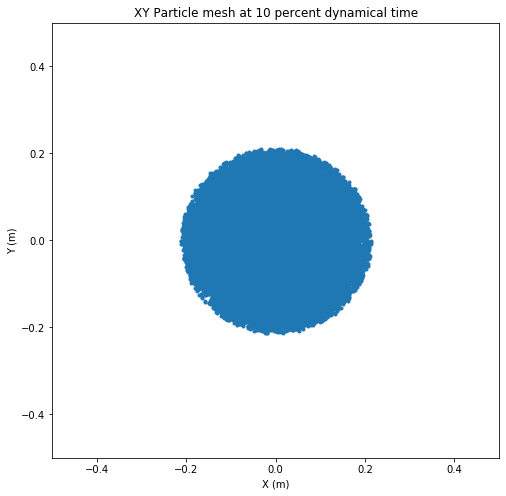

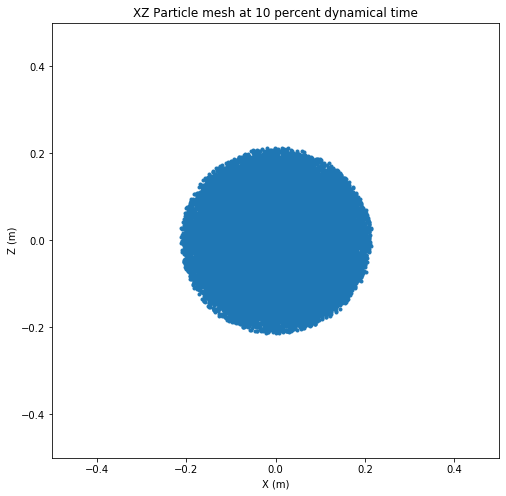

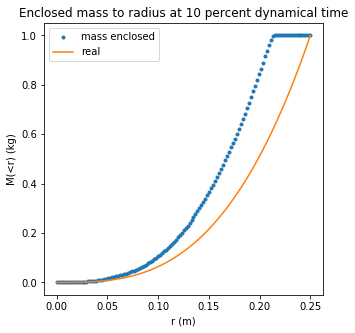

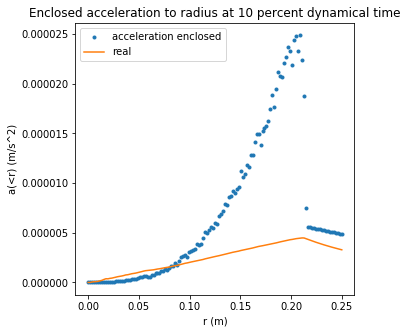

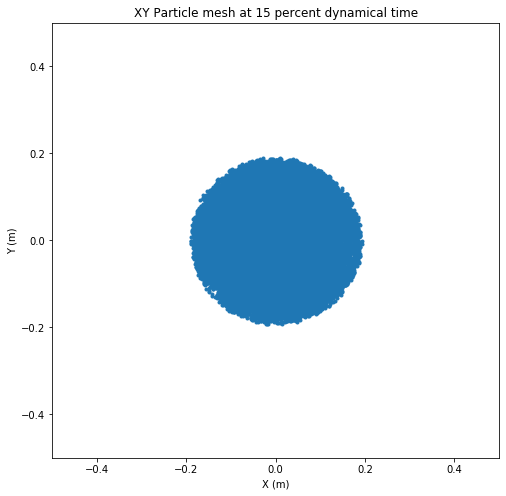

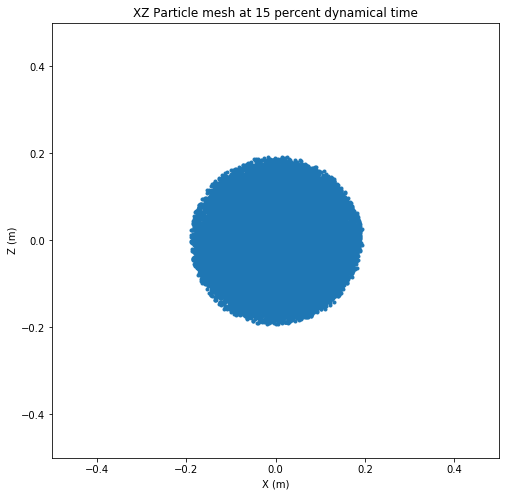

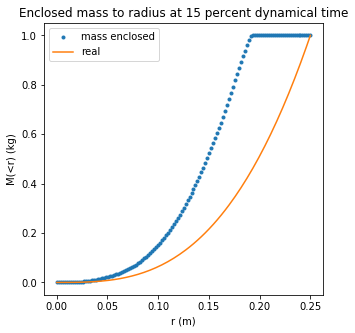

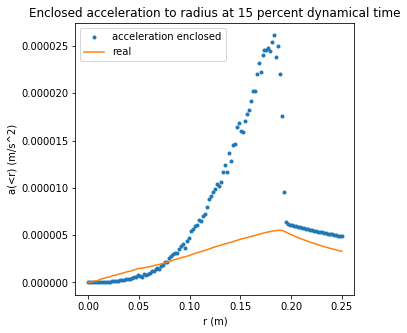

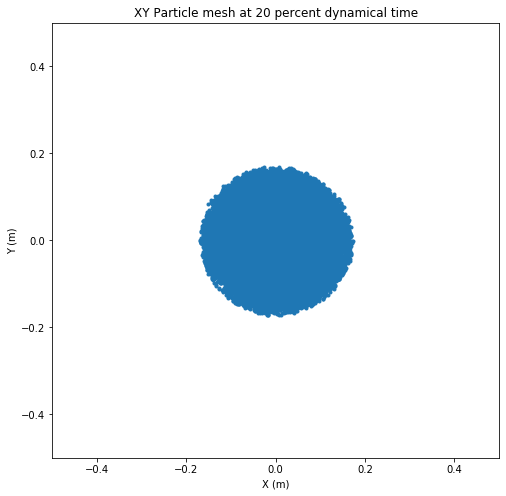

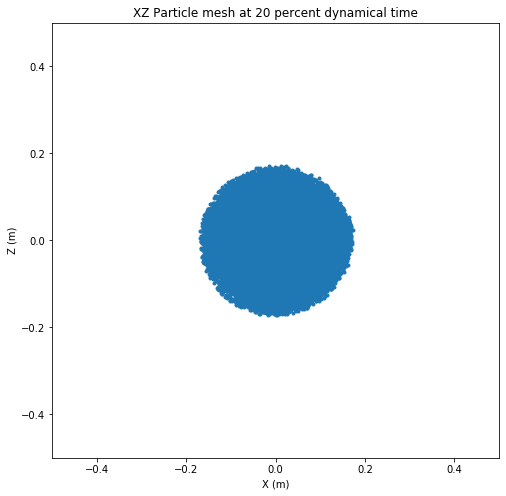

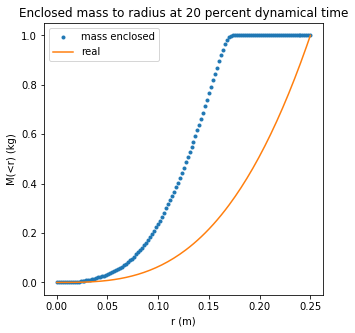

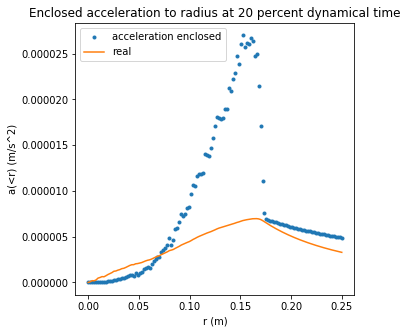

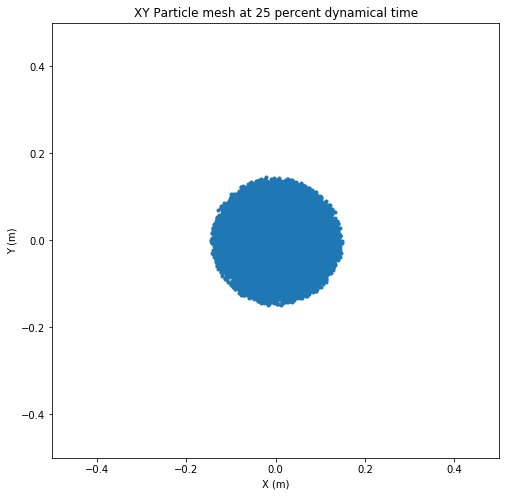

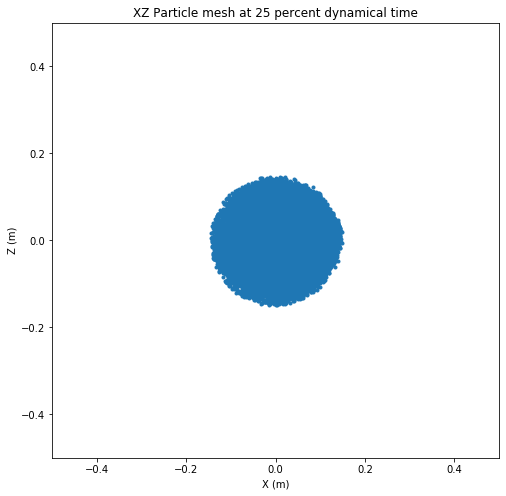

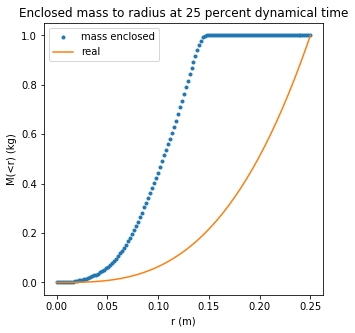

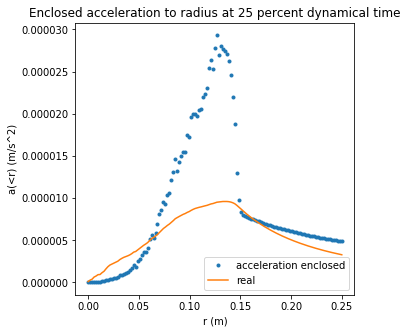

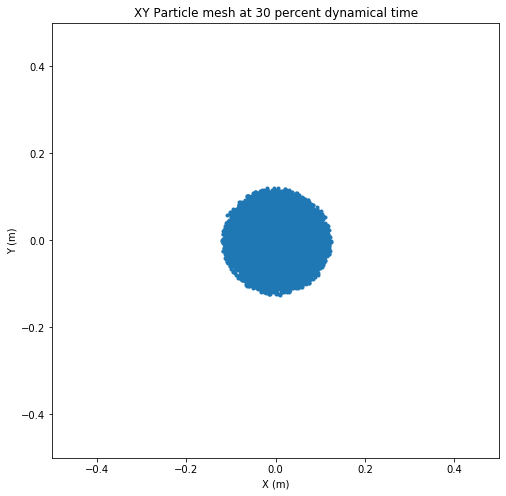

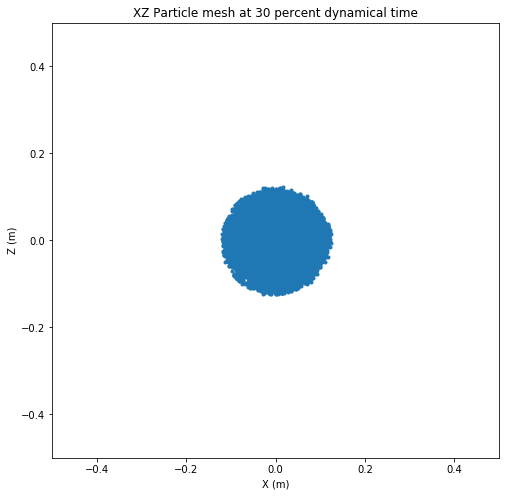

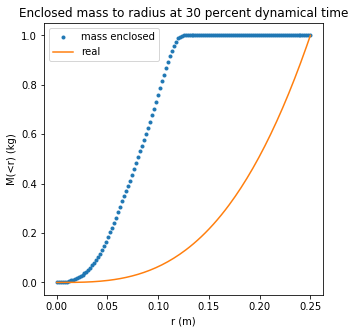

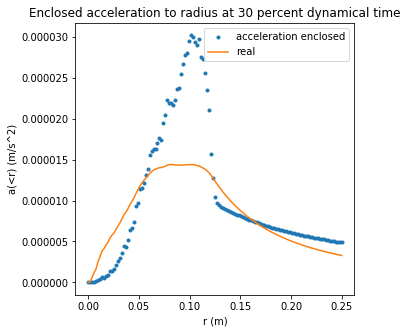

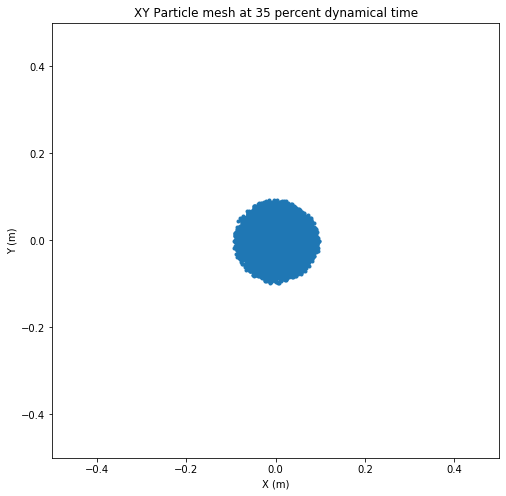

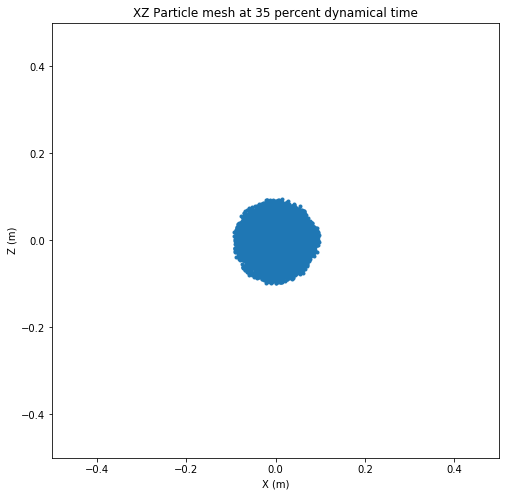

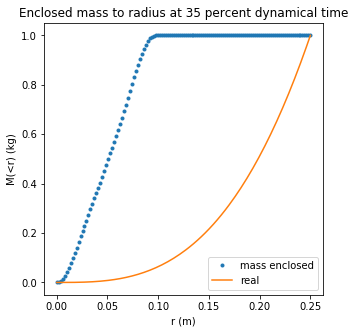

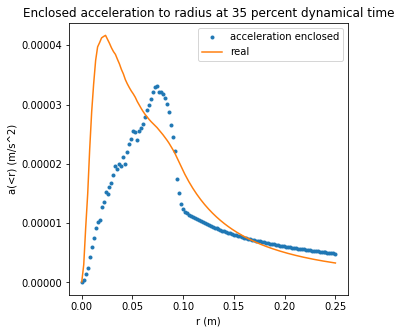

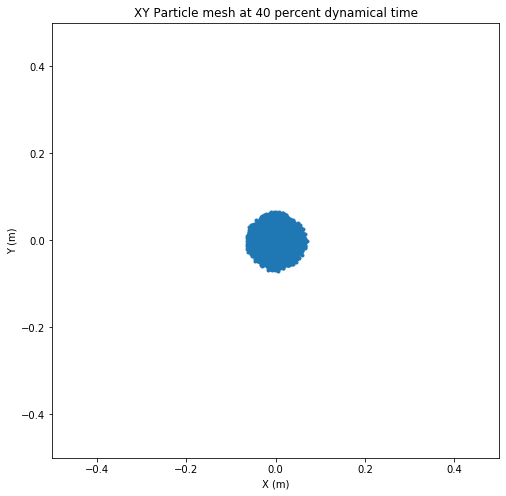

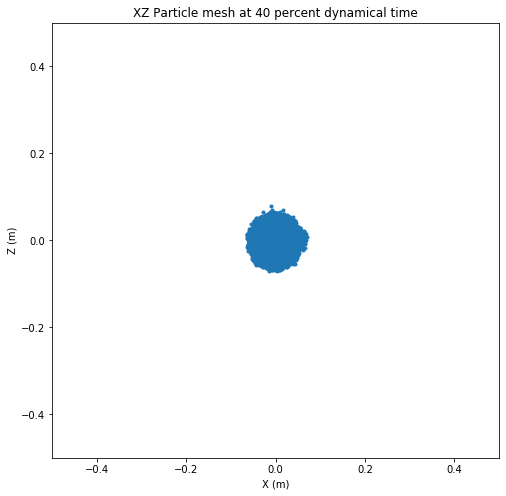

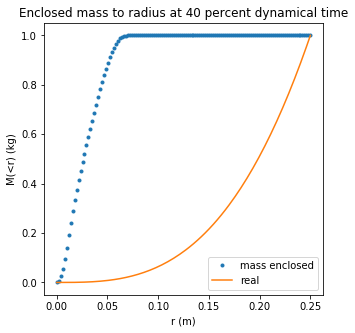

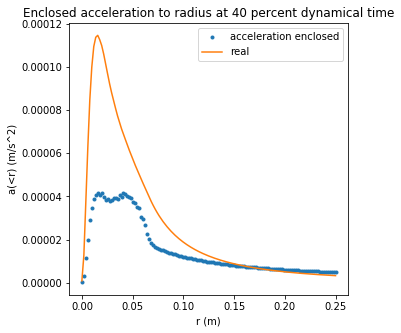

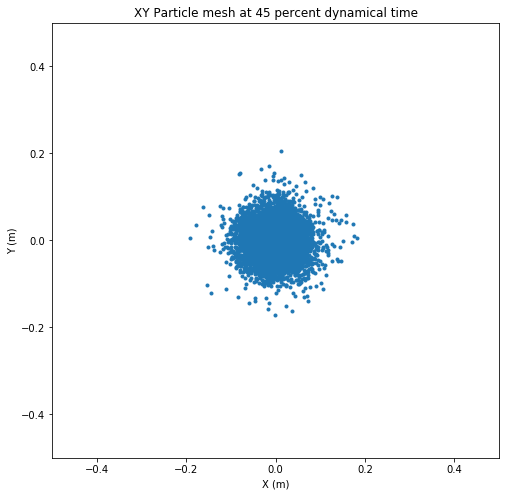

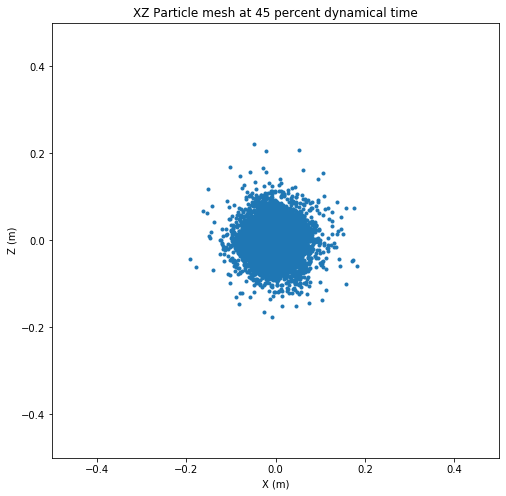

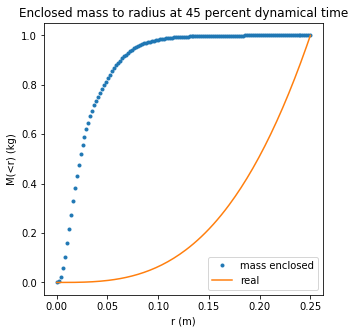

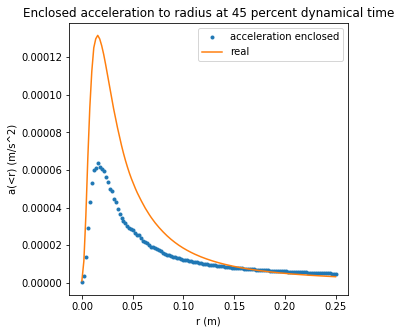

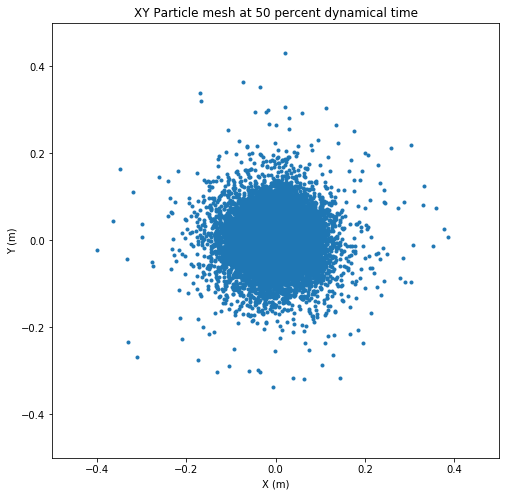

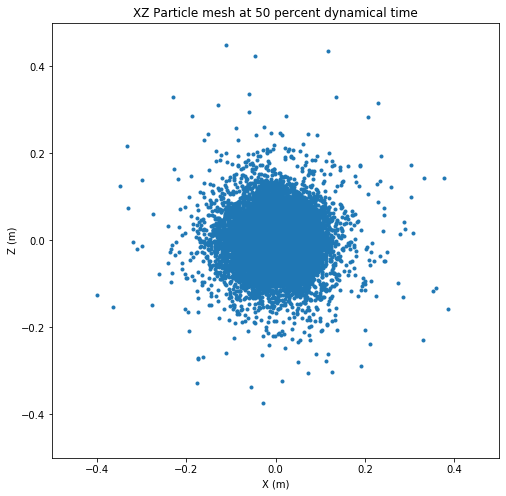

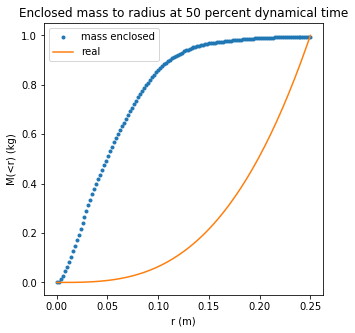

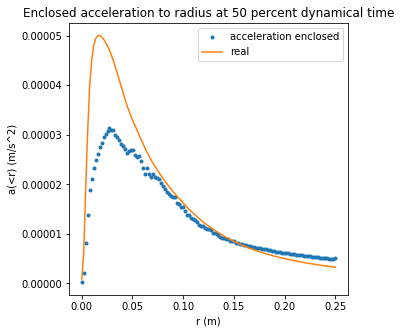

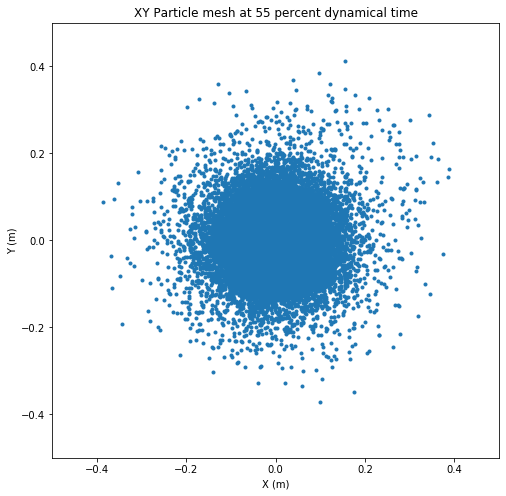

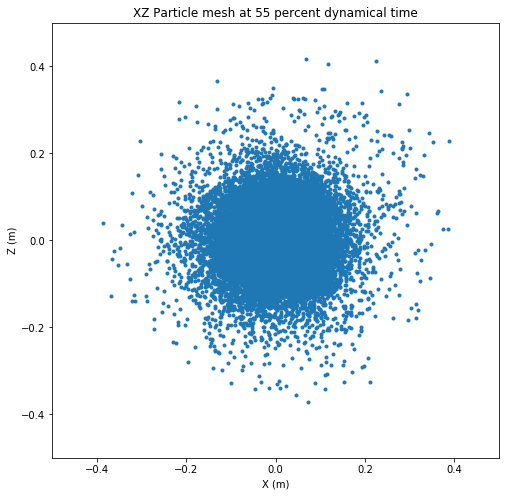

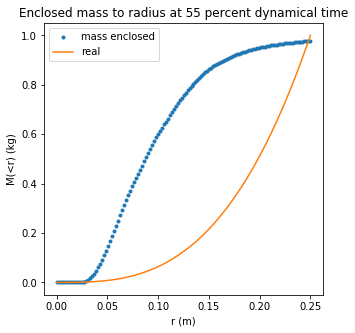

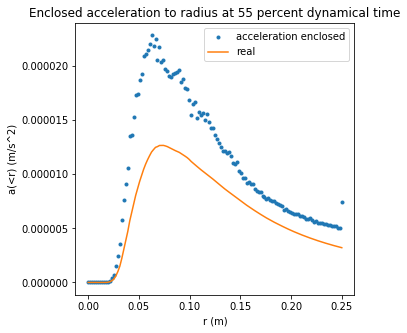

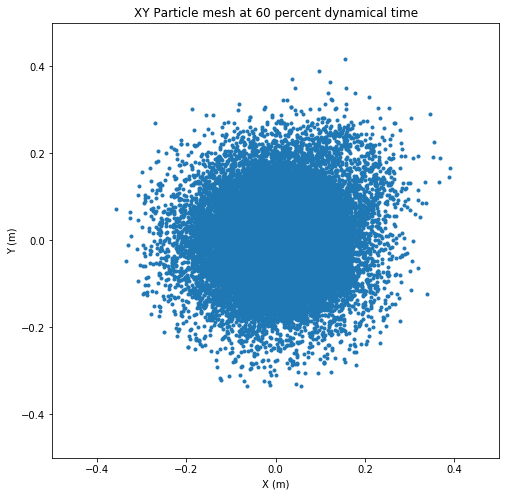

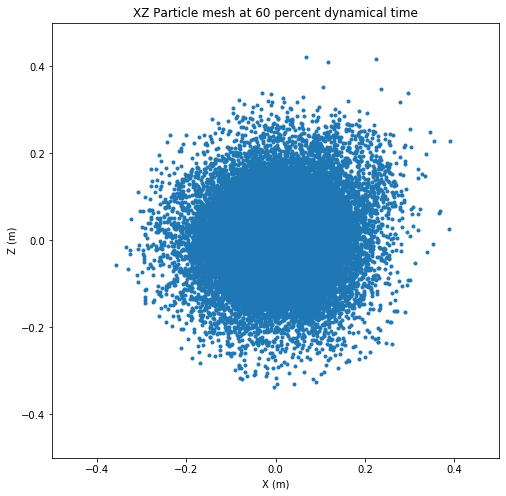

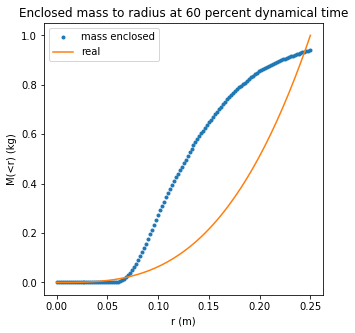

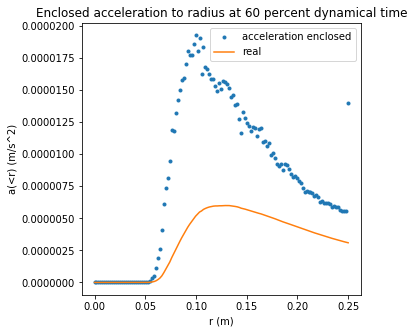

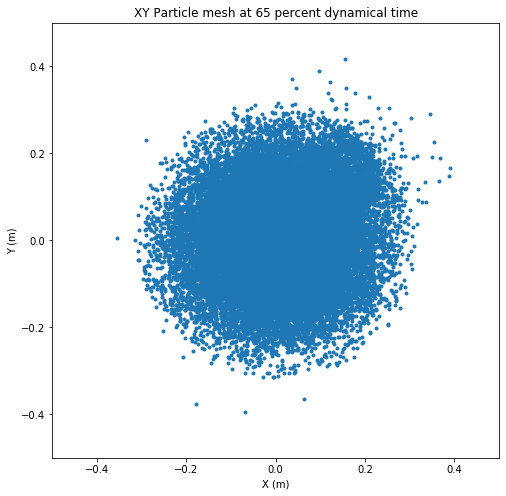

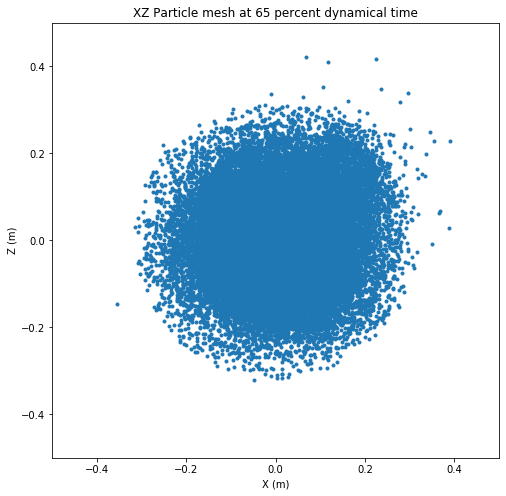

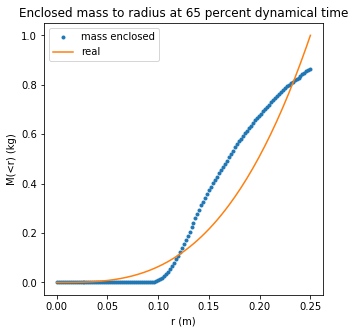

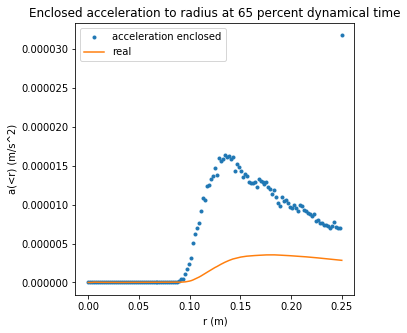

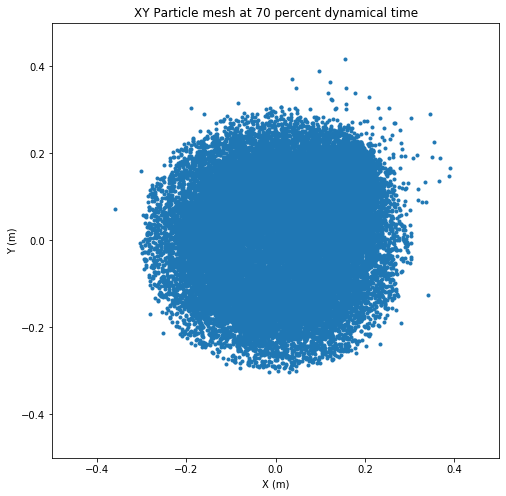

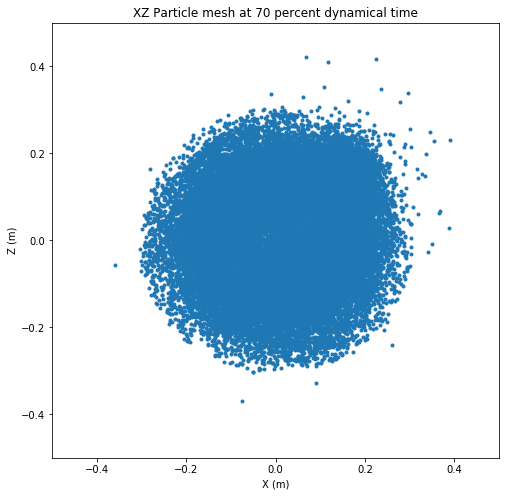

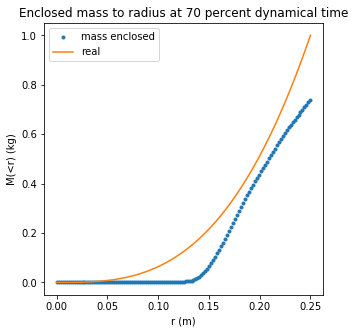

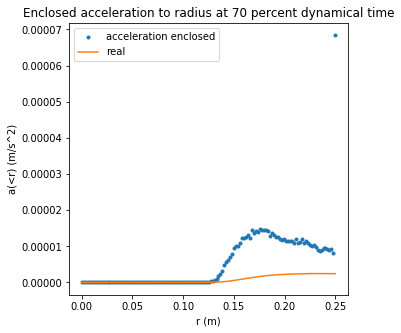

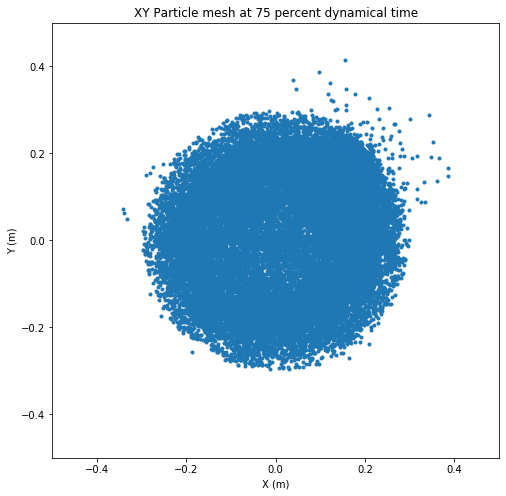

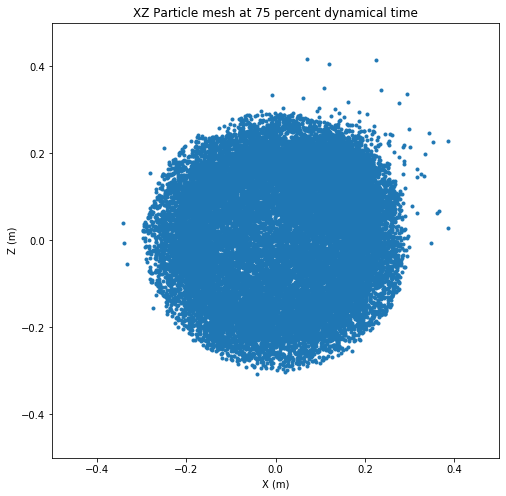

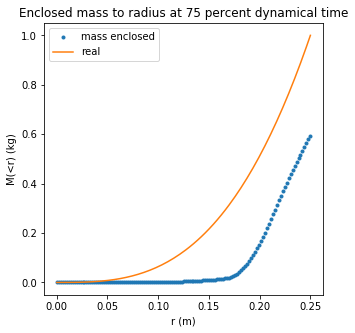

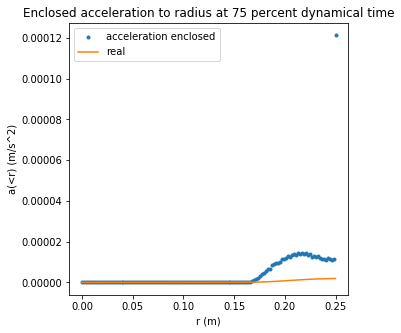

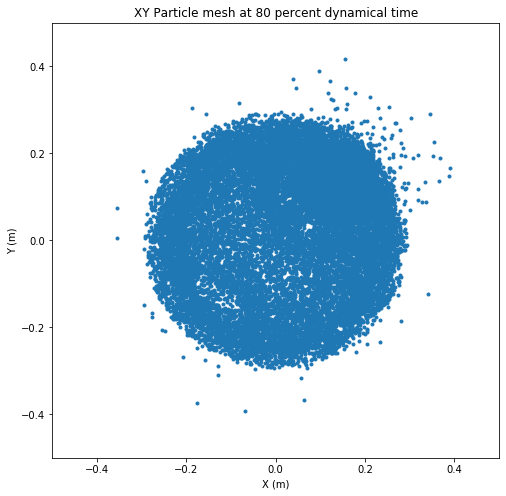

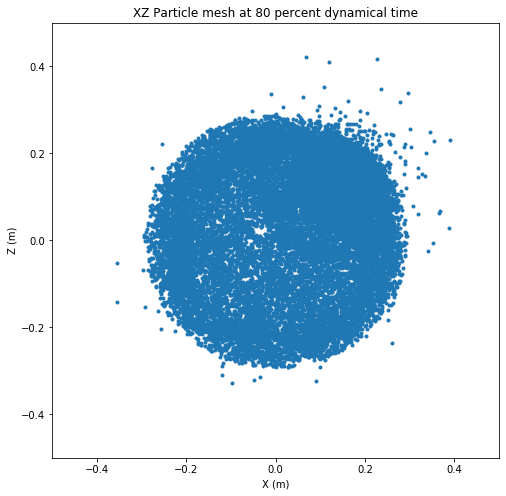

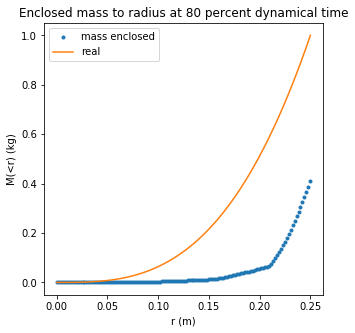

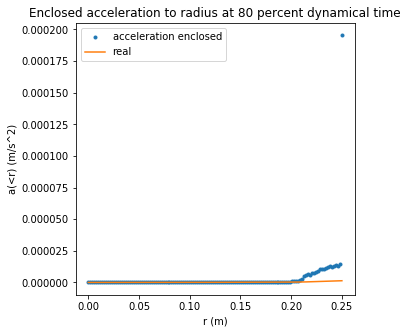

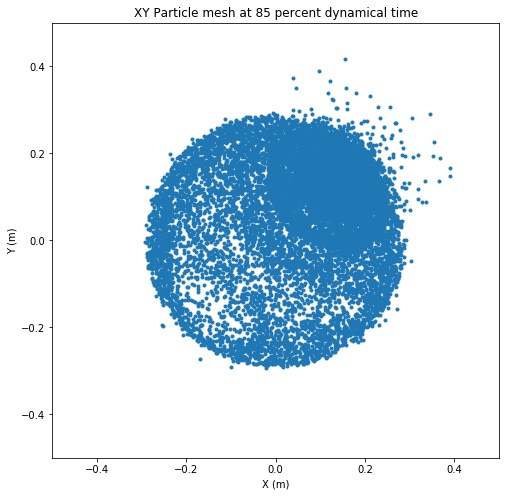

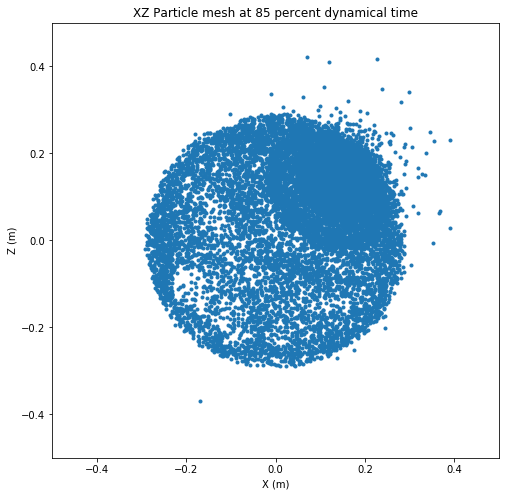

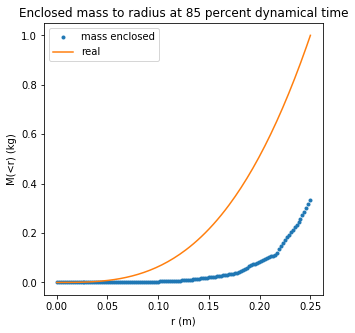

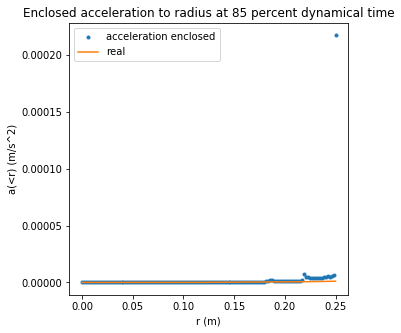

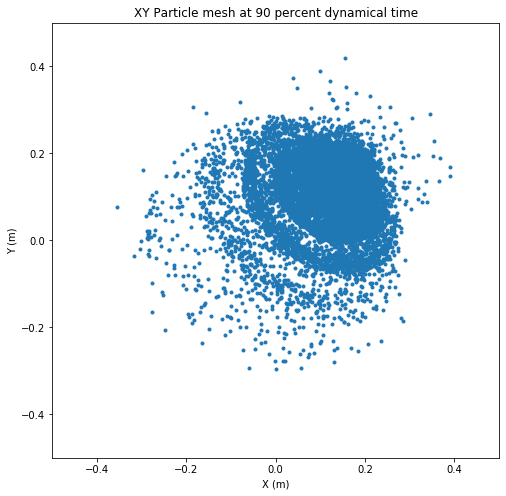

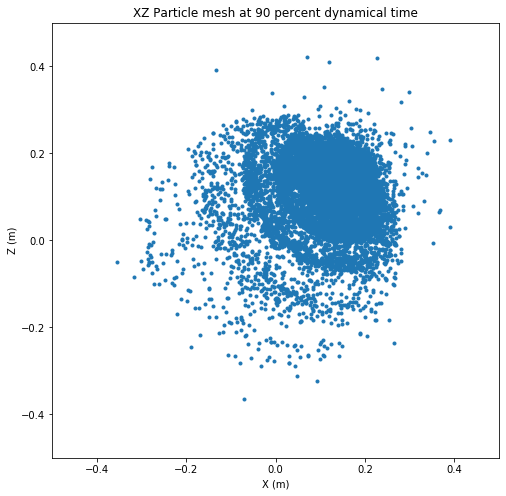

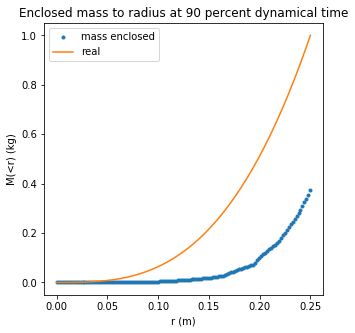

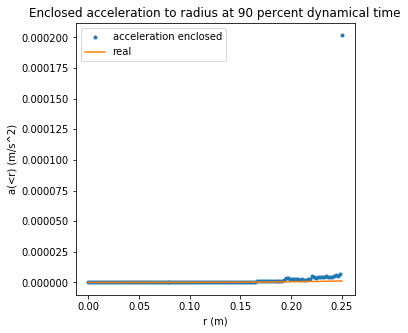

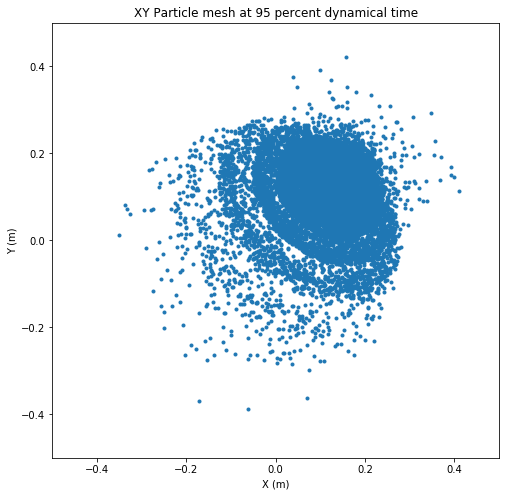

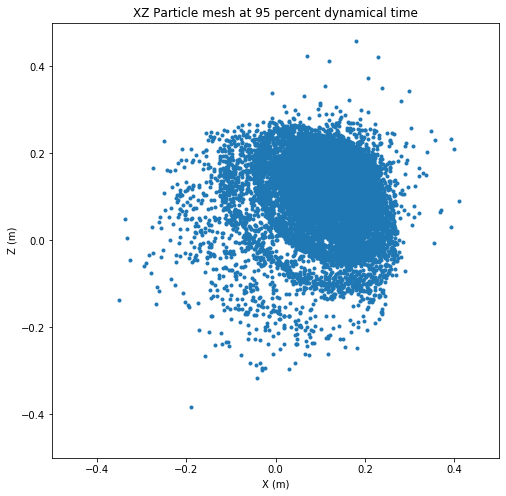

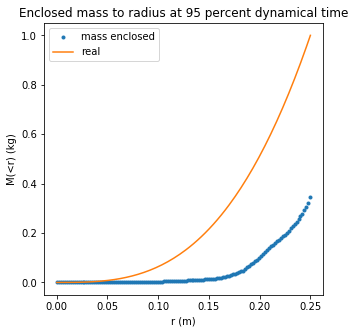

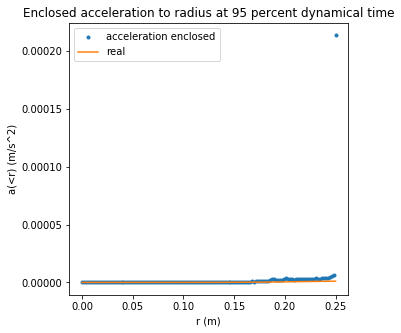

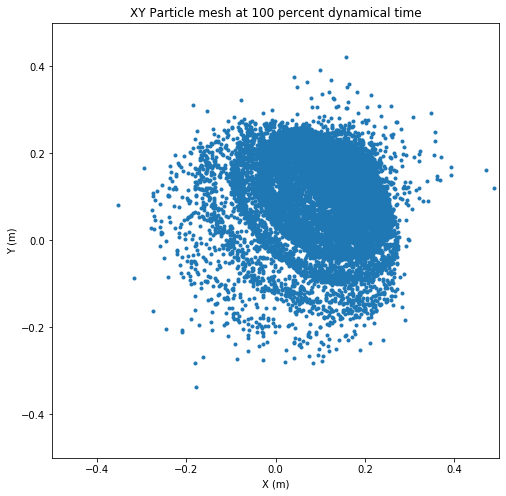

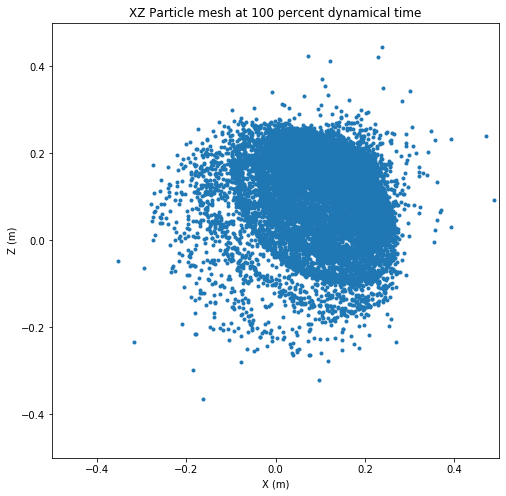

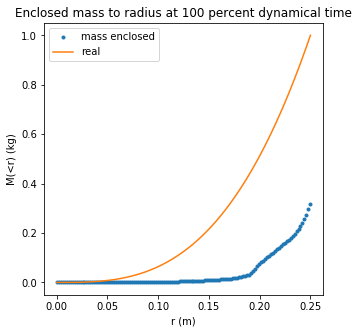

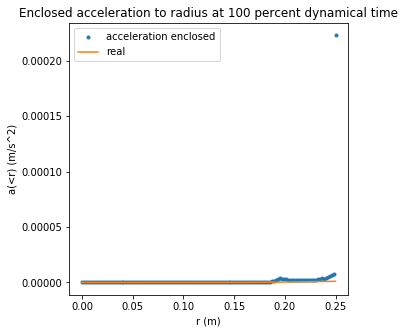

In [237]:
###Calculate initial dt from acceleration

def initialdt(f):
    gamma = .5
    delta = L/Nc
    result = np.zeros(Np)
    for i in range(Np):
        result[i] = (f[i][0]**2 + f[i][1]**2 + f[i][2]**2)**(1/2)
    amax = max(result)
    return gamma*sqrt(delta/amax)

dt = initialdt(fx) #accelerations acting on every particle

def mEnclosed(result):
    dr = L/Nc
    N = int(1/dr + 1)
    xaxis = np.linspace(0, Rs, N)
    resultR = np.zeros(N)
    for i in range(Np):
        x = result[i][0]
        y = result[i][1]
        z = result[i][2]
        r = (x**2 + y**2 + z**2)**(1/2)
        if int(round(r/.25*(N - 1))) >= N:
            # place on edge
            result[i][:3] = ((.25)**2/3)**(1/2)
            result[i][3:8] = 0
        else:
            resultR[int(round(r/.25*(N - 1)))] += m
    
    resRconst = copy.deepcopy(resultR)
    for ni in range(N):
        sumbef = sum(resRconst[:ni])
        resultR[ni] += sumbef
    
    return xaxis, resultR

def accEnclosed(result):
    dr = L/Nc
    N = int(1/dr + 1)
    xaxis = np.linspace(0, Rs, N)
    resultA = np.zeros(N)
    for i in range(Np):
        x = result[i][0]
        y = result[i][1]
        z = result[i][2]
        r = (x**2 + y**2 + z**2)**(1/2)
        ax = result[i][6]
        ay = result[i][7]
        az = result[i][8]
        a = (ax**2 + ay**2 + az**2)**(1/2)
        if int(round(r/.25*(N - 1))) < N:
            resultA[int(round(r/.25*(N - 1)))] += a
            
    resAconst = copy.deepcopy(resultA)
    for ni in range(N):
        sumbef = sum(resAconst[:ni])
        resultA[ni] += sumbef/(ni + 1)
    
    return xaxis, resultA

def verlet(den, wk, pot, force, fx, part, dt):
    #init
    t = 0
    iterator = 0
    w = 0
    imax = 10000
    epsilon = 5e-3
    
    #Dynamical time
    rhoavg = Ms/(4/3*np.pi*Rs**3)
    tdyn = (3*np.pi/(16*G*rhoavg))**(1/2)
    #print("tdyn = ", tdyn) #1187.9194662232937 sec
    
    # Update for acceleration
    part1 = part[0]
    part2 = part[1]
    part3 = part[2]
    result = copy.deepcopy(part1)
    for i in range(Np):  #6: ax; 7: ay; 8: az
        result[i][6] = fx[i][0]
        result[i][7] = fx[i][1]
        result[i][8] = fx[i][2]
    
    F = fx
    midf = F*dt/2 
    #print(F, midf)
    
    ###Kick: v(n + 1/2) = v(n) + a(n)*Δt/2
    midvx = np.zeros((Np, 3))
    midvy = np.zeros((Np, 3))
    midvz = np.zeros((Np, 3))
    for i in range(Np):
        midvx[i][0] = result[i][3] + midf[i][0]
        midvy[i][1] = result[i][4] + midf[i][1]
        midvz[i][2] = result[i][5] + midf[i][2]
    
    while t < tdyn and iterator < imax:

        ###Drift: x(n + 1/2) = x(n) + v(n + 1/2)*Δt
        for i in range(Np):
            #print(result)
            #print(midvx)
            result[i][0] += midvx[i][0]*dt
            result[i][1] += midvy[i][1]*dt
            result[i][2] += midvz[i][2]*dt
        
        partpos = np.zeros((3, Np))
        for i in range(Np):
            partpos[0][i] = result[i][0]
            partpos[1][i] = result[i][1]
            partpos[2][i] = result[i][2]
        
        #Process
        rhox = den(partpos)/Vc
        rhok = np.fft.rfftn(rhox) 
        phik = rhok * wk
        phix = np.fft.irfftn(phik)
        fvector = gradient(phix)*(L/Nc)**2
        fx = force(part2, fvector)
        
        #Updated F
        F = fx
        
        ###Kick: v(n + 1) = v(n + 1/2) + a(n + 1)*Δt/2
        for i in range(Np):
            result[i][3] = midvx[i][0] + F[i][0]*dt/2
            result[i][4] = midvy[i][1] + F[i][1]*dt/2
            result[i][5] = midvz[i][2] + F[i][2]*dt/2
        
        ###Update Drift: v(n + 1/2) = v(n) + a(n)*Δt/2
        midf = F*dt/2
        for i in range(Np):
            midvx[i][0] += F[i][0]*dt
            midvy[i][1] += F[i][1]*dt
            midvz[i][2] += F[i][2]*dt
        
        #Update dt
        resultv = np.zeros(Np)
        resulta = np.zeros(Np)
        for i in range(Np):
            resultv[i] = (result[i][3]**2 + result[i][4]**2 + result[i][5]**2)**(1/2)
            resulta[i] = (F[i][0]**2 + F[i][1]**2 + F[i][2]**2)**(1/2)
        vmax = max(resultv)
        amax = max(resulta)
        delta = L/Nc
        gamma = .5
        dt = gamma*min(delta/vmax, sqrt(delta/amax))
        t += dt
        
        nt = 20
        tcount = 0
        print(t/tdyn)
        for i in range(w, nt):
            if abs(t/tdyn - 1/nt*(i + 1)) < epsilon:
                print("t at %d percent dynamical time" %(1/nt*(i + 1)*100))
                
                plt.figure(figsize=(8,8))
                plt.subplot(111)
                plt.plot(partpos[0], partpos[1], '.')
                plt.axis([-0.5, 0.5, -0.5, 0.5])
                plt.xlabel('X (m)')
                plt.ylabel('Y (m)')
                plt.title("XY Particle mesh at %d percent dynamical time" %(1/nt*(i + 1)*100))
                
                plt.figure(figsize=(8,8))
                plt.subplot(111)
                plt.axis([-0.5, 0.5, -0.5, 0.5])
                plt.plot(partpos[0], partpos[2], '.')
                plt.title("XZ Particle mesh at %d percent dynamical time" %(1/nt*(i + 1)*100))
                plt.xlabel('X (m)')
                plt.ylabel('Z (m)')
                
                plt.figure(figsize=(5,5))
                plt.subplot(111)
                mEnc = mEnclosed(result)
                plt.plot(mEnc[0], mEnc[1]/Ms, '.', label = "mass enclosed")
                f = (mEnc[0]/Rs)**3
                plt.plot(mEnc[0], f, label = "real")
                plt.title("Enclosed mass to radius at %d percent dynamical time" %(1/nt*(i + 1)*100))
                plt.xlabel('r (m)')
                plt.ylabel('M(<r) (kg)')
                plt.legend()
                
                plt.figure(figsize=(5,5))
                plt.subplot(111)
                accEnc = accEnclosed(result)
                plt.plot(accEnc[0], accEnc[1], '.', label = "acceleration enclosed")
                aAvg = G*mEnc[1]/(accEnc[0] + 1/Nc)**2
                plt.plot(accEnc[0], aAvg, label = "real")
                plt.title("Enclosed acceleration to radius at %d percent dynamical time" %(1/nt*(i + 1)*100))
                plt.xlabel('r (m)')
                plt.ylabel('a(<r) (m/s^2)')
                plt.legend()
                
                w += 1
                
        iterator +=  1
        
    return result

V = verlet(density, wk, gradient, force, fx, part, dt)
plt.show()

# Discussion of Results

At time t = 0 sec., the particles formed a randomly generated sphere with approximate radius r = .25 m. 
\
\
From t = 0 to t = 40% dynamical time, the particle mesh collapsed in on itself, as shown by the XY and XZ  graphs. The XY and XZ graphs look identical, and this shows that the particle mesh is uniform in the process of shrinking. 
\\
The mass enclosed to radius graphs showed that as time went on, the radius of the sphere shrank, and the density became larger. The reason why it still shows mass in the graphs after what is supposed to be total mass decreasing down to zero since it is shrinking, is because the graph shows an accumulative amount; it shows the mass at that point plus the sum of the mass enclosed from that radius. The average accleration enclosed showed that as time went on, the particles moved towards the center and the accleration peaks drew closer to the radius, showing that the collapse became faster as time went on.
\\
The acceleration peaks matches the shape (for the most part) of my calculated acceleration; it is off by some factor. As you can see, the acceleration peak follows the mass enclosed plot, showing that the largest accelerations are those that are farthest away from the center. This makes sense since although they are farther away from the center, they are attracted by MANY particles at the center, and according to newton's law of gravitation and the law of superposition, they will have a large acceleration. Meanwhile, particle more close to the center will have a smaller acceleration since although they are at the center of the sphere, they are attracted to every other particle that is away from the center of the sphere, so according to the law of superposition, this negatively affects their acceleration, in turn negatively affecting their acceleration.
\
\
At around t = 40% dynamical time, it collapses to its smallest size, as shown in the XY and YZ plots. The radius of the sphere is about .05 m and the acceleration of the sphere is the highest near the center of the sphere, which makes sense since the closer a particle is to a massive object, its acceleration and velocity as well due to the law of gravitation.
\
\
From t = 45% dynamical time to around t = 60% dynamical time, the particle mesh spread out due to the particle's increased speed. I imagine that the particles are decreasing in speed at this point since they are getting farther away from the particles. They are almost smashing into each other, increasing their velocity as they get close to other particles, and passing through to the other side of the sphere.
\
\
The mass enclosed graphs show that the particles are going back towards the edge of the sphere. The curve of the mass enclosed graphs slowly come back to its original form, but not quite. This is due to the fact that some particles had a very high velocity going through the center and travel such that the acceleration due to the other particles isn't enough to stop it. Therefore, the mass enclosed graph shows that as time goes on, the curve deforms since when it reaches the radius where most of the particles are, there are still particles outside of that radius. 
\
\
The acceleration enclosed shows the particles coming back with the accelerations being higher in the middle of the radius of the sphere. This is because many of the particles outside the original radius have such a high velocity, so many middle-radius particles are following.
\
\
From t = 60% dynamical time to around t = 100% dynamical time, the particle mesh collapsed towards one corner of the sphere. They slowly form and since that is where many of the particles ended up for some reason (I imagine it was due to the random positions of the particles); the rest of the particles still followed since the mass of the structure became large, and the force acting on the smaller masses far away from the structure increased in the direction toward the structure, once again due to law of gravitation. Eventually, all the particles will end up there and will probably smash into each other, similar to the case at time t = 40% dynamical time to around t = 60% dynamical time.
\
\
The mass enclosed curves show that there are particles that are going beyond the original radius of the sphere. This is shown by not having all of the mass enclosed inside the original radius of the sphere; some particles have a radius of more than .25 m, and more and more keep on going outside that radius as time goes on. Many of the particles are headed toward the structure in the corner, which is mostly outside of the original radius. 
\
\
The acceleration plots show that the acceleration of the particles are highest where the particles are, which are close to the original radius. The particles are mostly near the structure, and those that are far from that structure but are on the opposite side are also trying to get to the dense structure, increasing their accleration, according to the law of gravitation.
\
\
The limitations of the PM code is that although it is fast, it is inaccurate. The particle mesh code is inaccurate in relationship to something like the particle-particle method (which is slow in relation to PM) since the particles are treated as proportions instead of the whole particle. This will affect their accelerations, including calculations towards them. They also make use of the verlet code, which is inaccurate up to the third order.

# Independent Project: Particles with Random Initial Velocity

For the Independent Project, I will generate particles with random initial velocity such that they will have velocities with alternating signs depending on their randomized radial position.
\
\
I hypothesized that the particles would form rings first before collapsing, based on their radial positions, and the whole process being very similar to the case of the particles since the initial velocity of the particles were quite small.

45.11568215841945 124.26305922155979
22.557841079209727
0.018281719731310812
0.0357104877046341
0.052335256567634485
t at 5 percent dynamical time
0.06827048919883422
0.08360314509809744
0.09836088328906602
t at 10 percent dynamical time
0.11251806536014355
0.12614207040920275
0.139288703757038
0.15200580825288124
t at 15 percent dynamical time
0.1643317014213341
0.17629936150003497
0.18794201015627637
0.19928937110062347
t at 20 percent dynamical time
0.2103663028532905
0.22119325307731474
0.2317868307273166
0.24216070437148554
0.2523257870128617
t at 25 percent dynamical time
0.2622921434266368
0.2720700774683856
0.2816689465528498
0.2910970917729731
0.30036222934508156
t at 30 percent dynamical time


/Users/GrandmasterFung/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:158: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/GrandmasterFung/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:166: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/GrandmasterFung/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:174: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory.

0.3094717230816369
0.3184332788031368
0.3272547426842478
0.33594339776525095
0.3445058921319194
0.35285178119279664
t at 35 percent dynamical time
0.3609268366778314
0.36875418087846445
0.376361201943501
0.3837706632189895
0.3910007213730598
0.3980667086301866
t at 40 percent dynamical time
0.4049772265201494
0.41173944090286496
0.4183647975921857
0.4248639714874799
0.43124674848342553
0.4375221434922895
0.44369903301889874
0.4497868114258104
t at 45 percent dynamical time
0.45579022343751735
0.4617122890794951
0.46755876230181154
0.4733348042248553
0.4790451873691431
0.4846944482329994
0.4902871521887987
0.49582801568637974
t at 50 percent dynamical time
0.5013194153513028
0.5067634177333235
0.5121639929138617
0.5175249505738677
0.5228500237330254
0.5281428687644912
0.5334073238544753
0.5386473167326176
0.5438665848152521
0.5490687281930391
t at 55 percent dynamical time
0.5542515529951928
0.5594118837887404
0.5645511321234196
0.5696705680821477
0.5747713407840986
0.5798544726863479
0

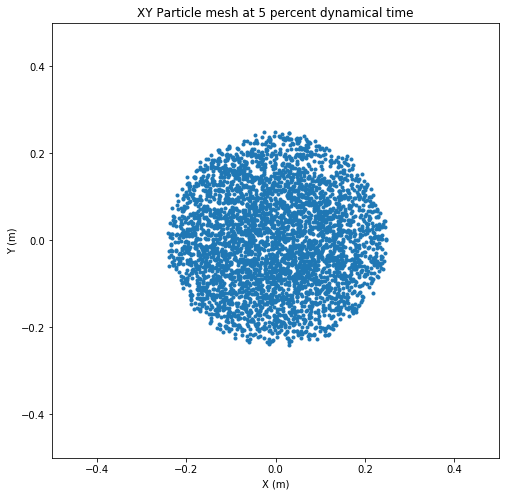

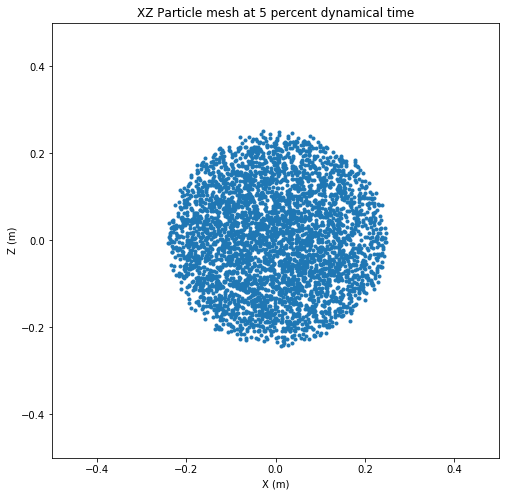

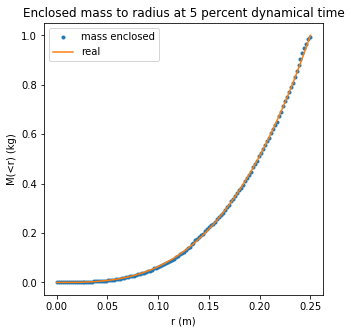

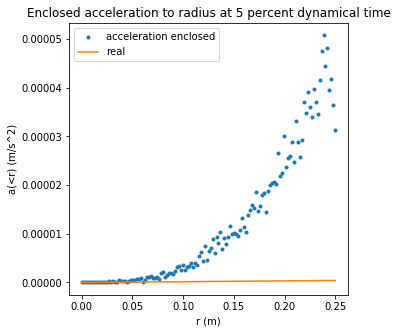

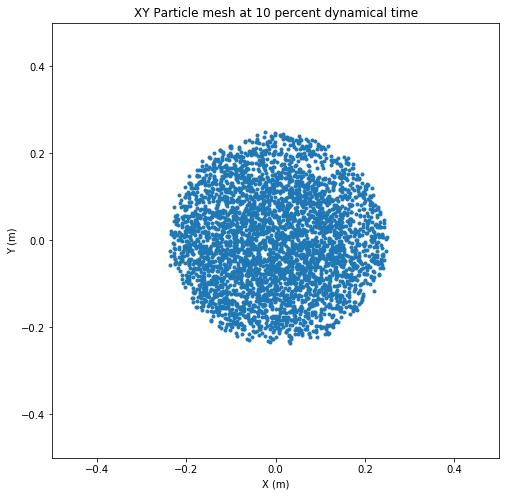

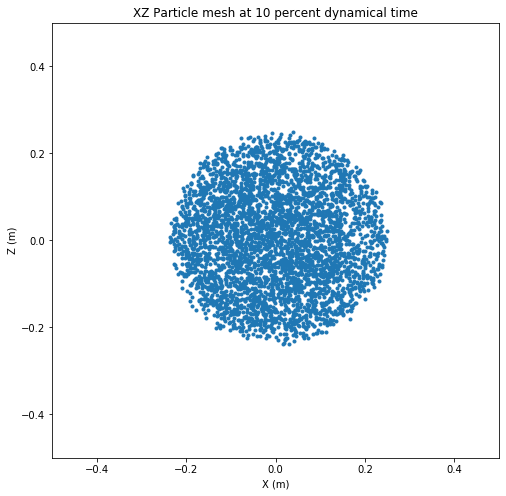

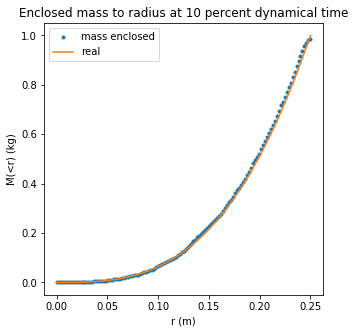

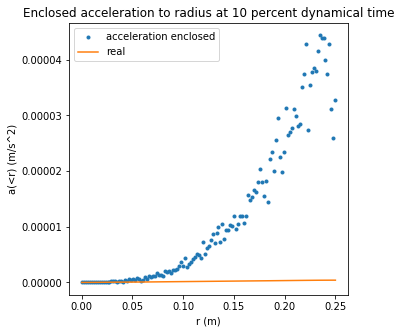

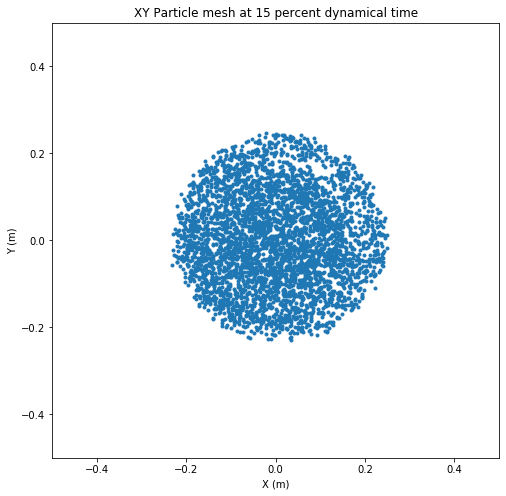

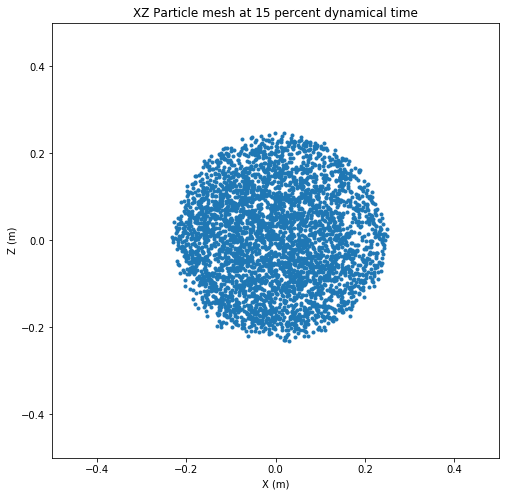

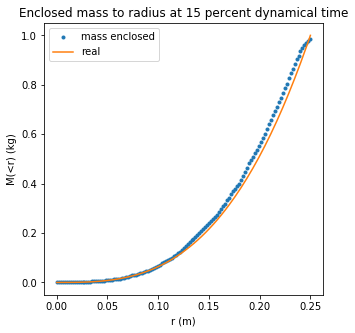

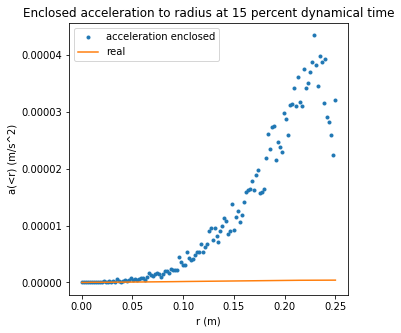

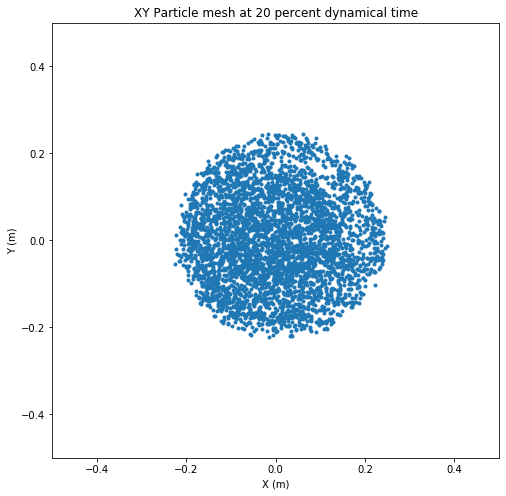

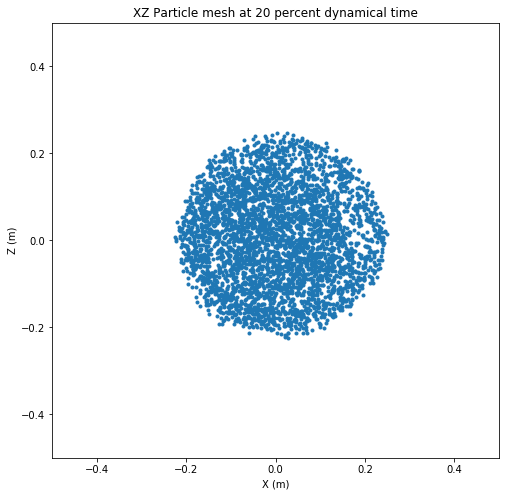

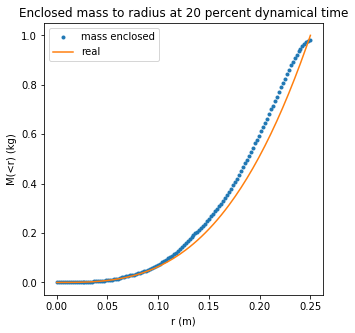

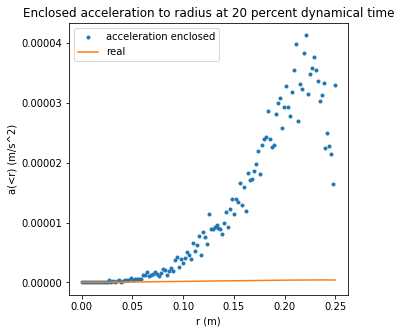

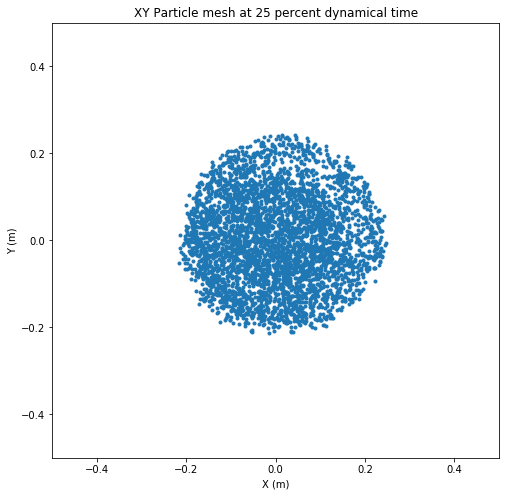

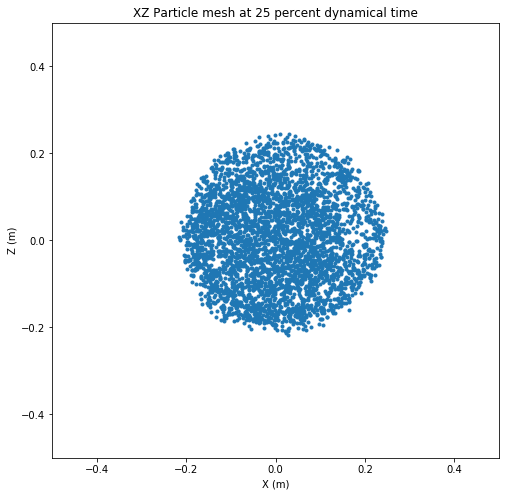

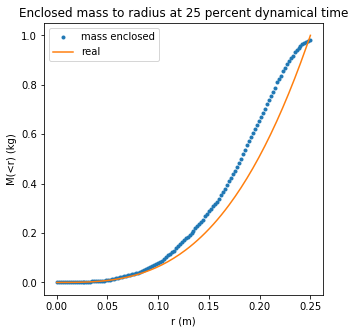

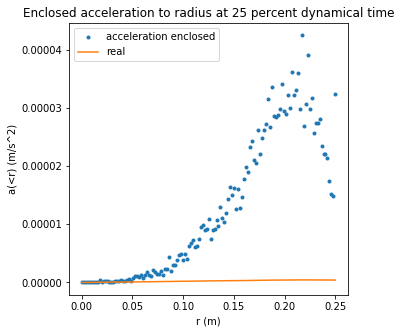

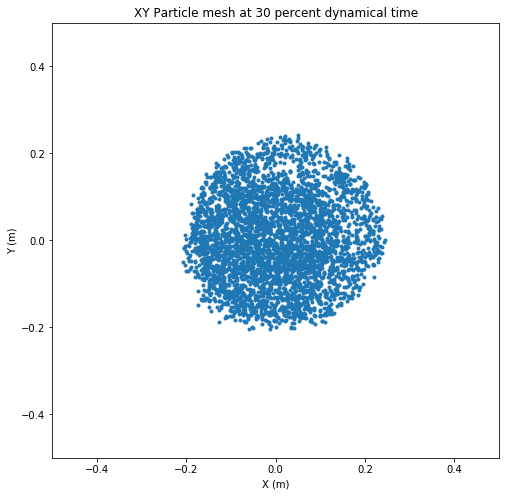

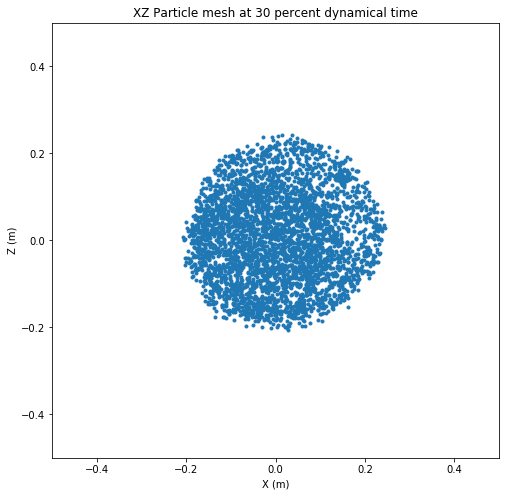

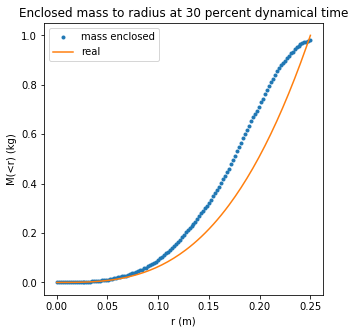

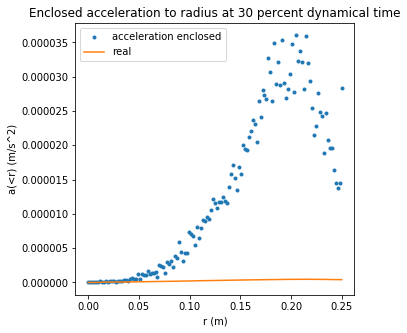

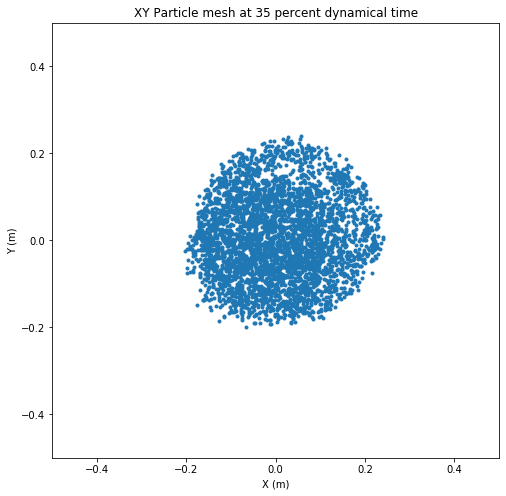

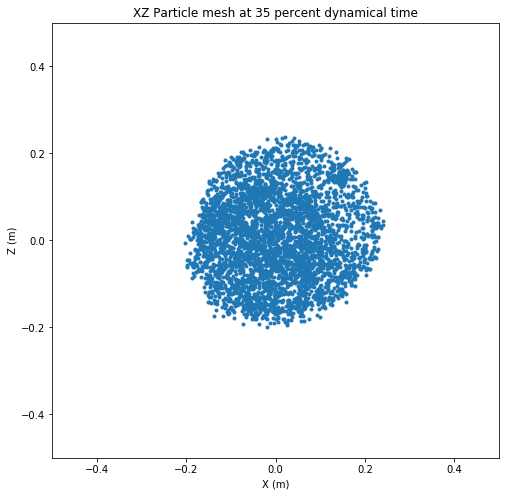

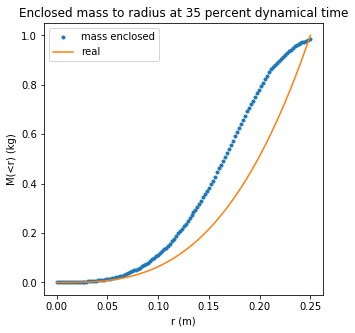

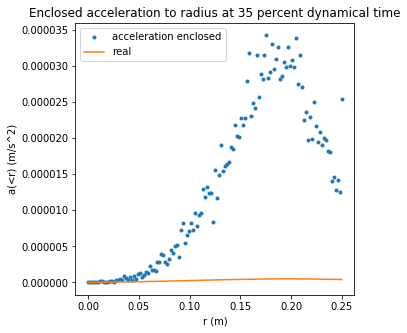

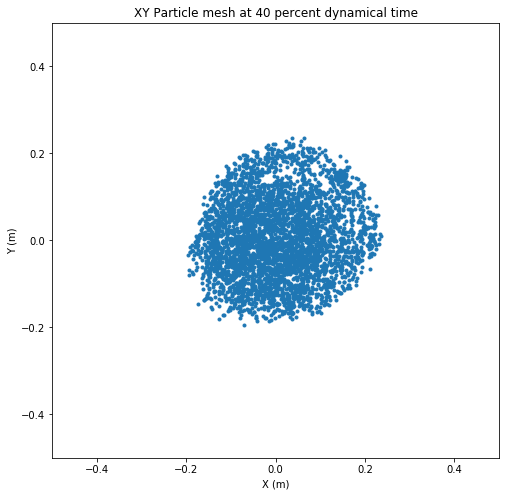

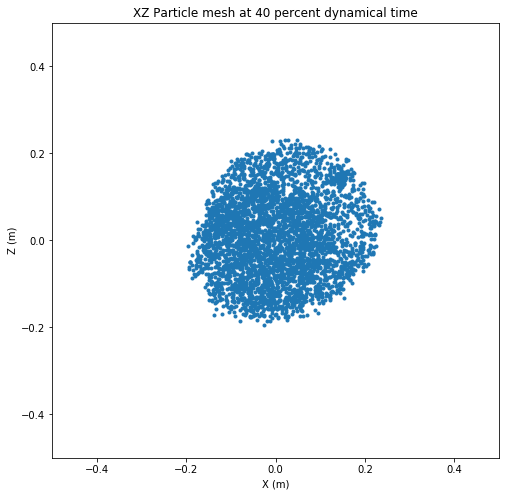

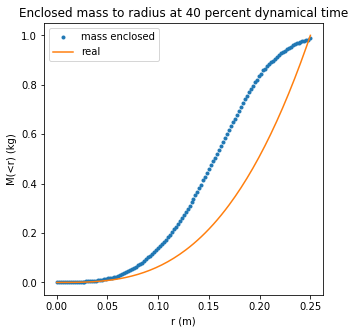

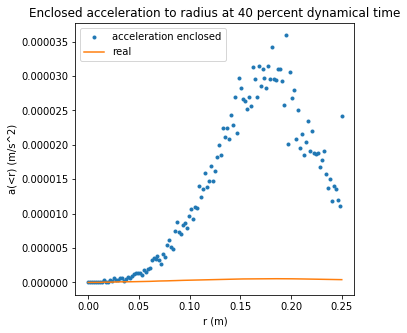

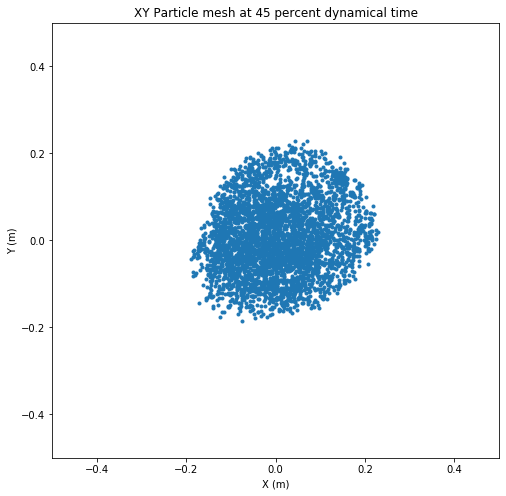

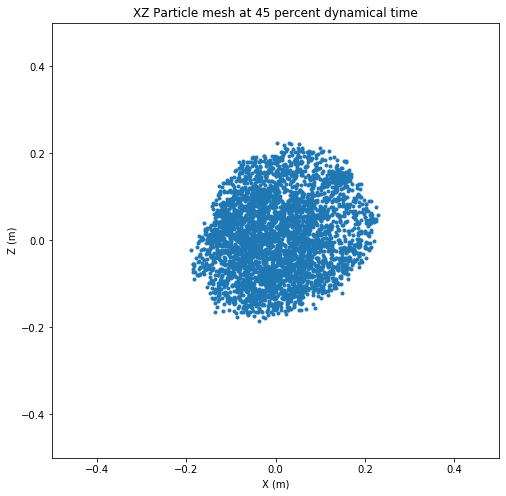

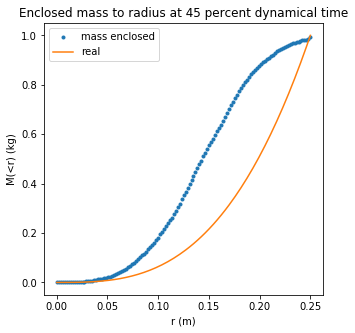

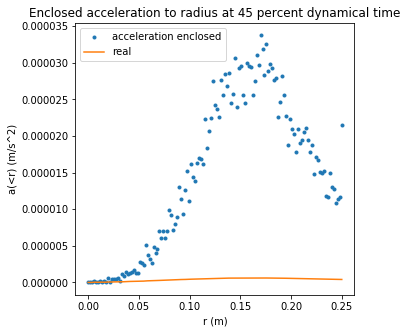

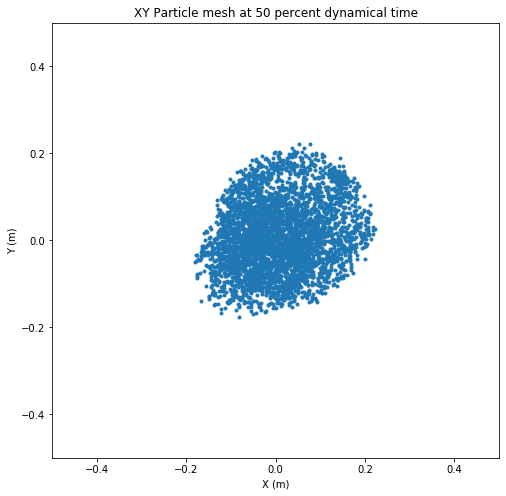

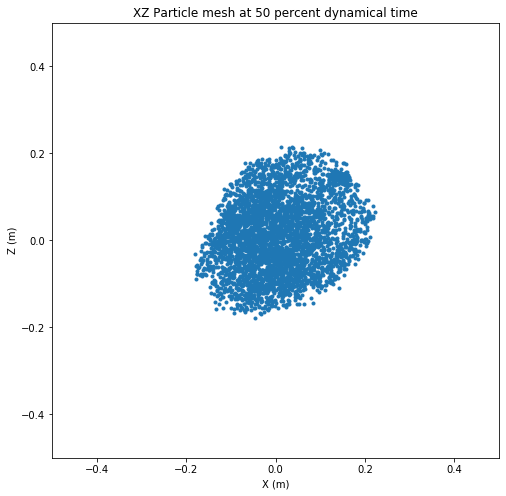

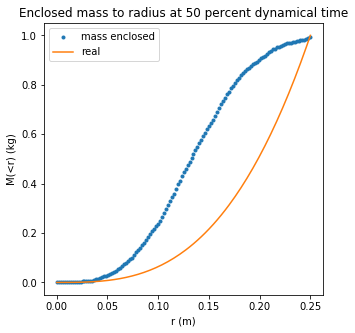

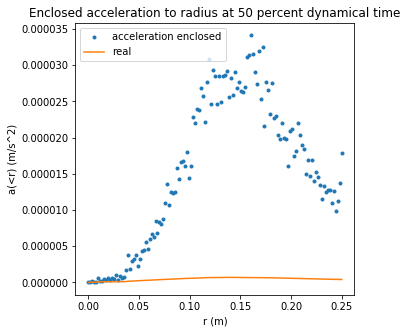

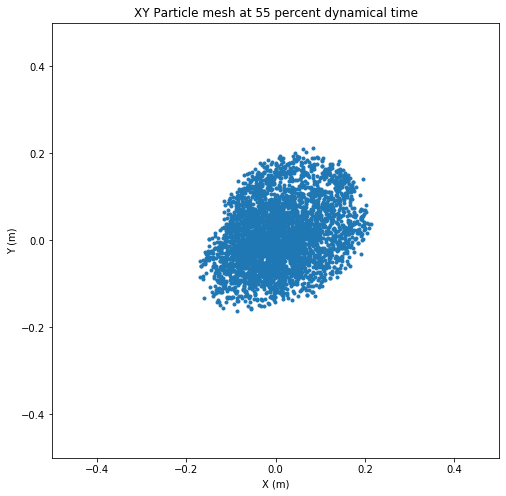

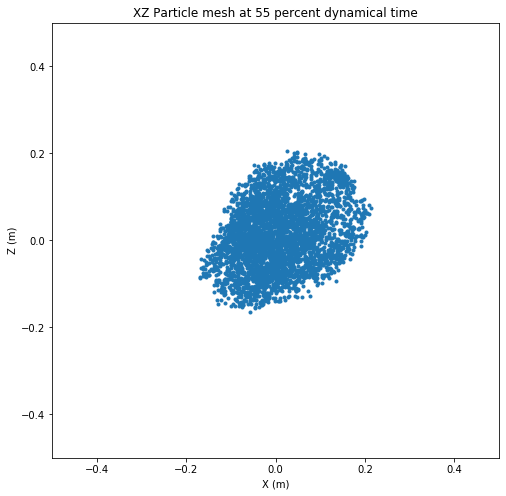

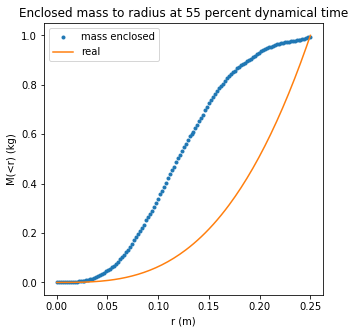

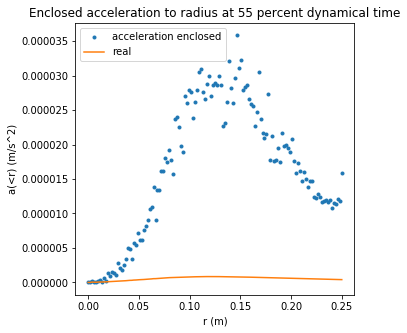

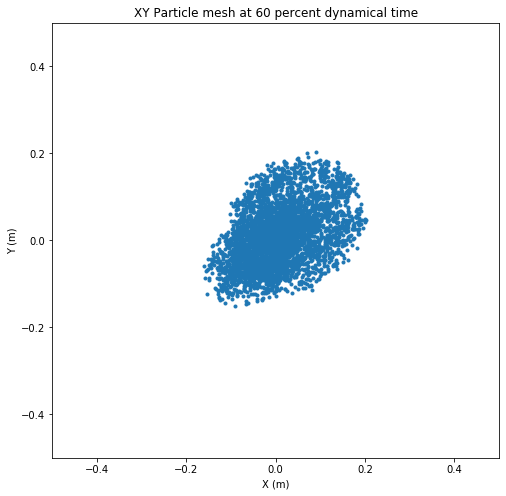

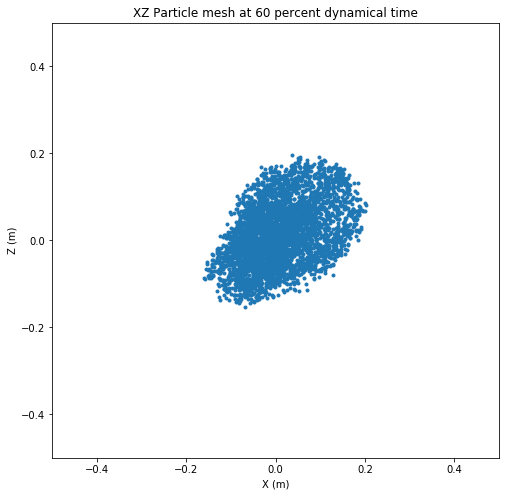

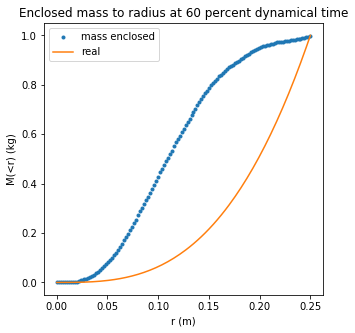

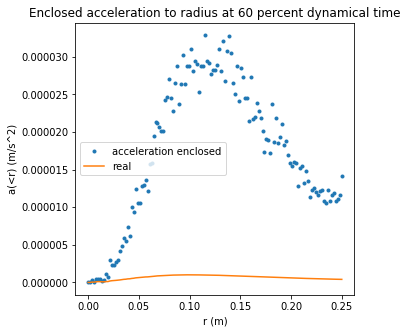

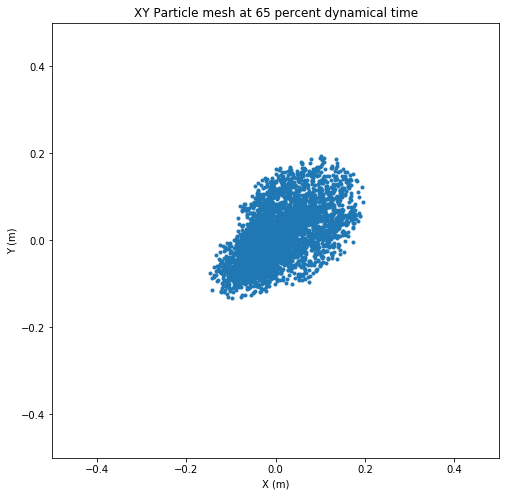

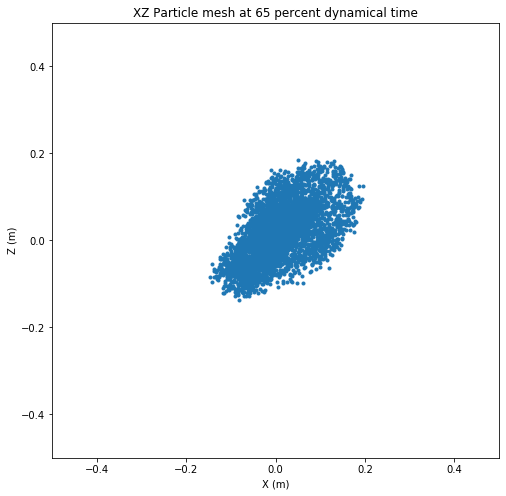

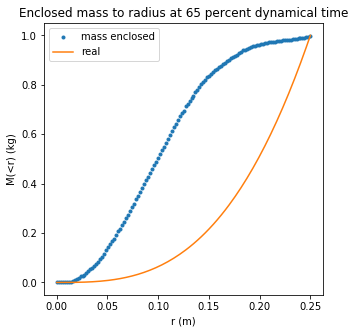

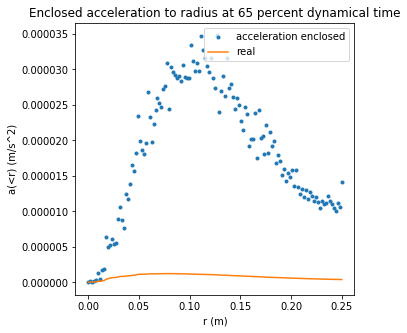

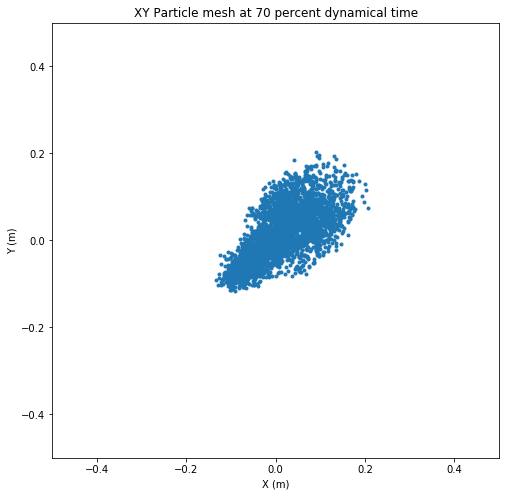

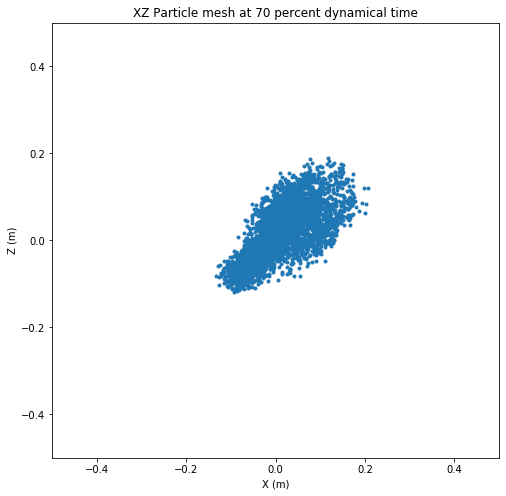

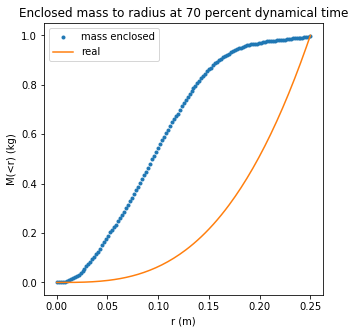

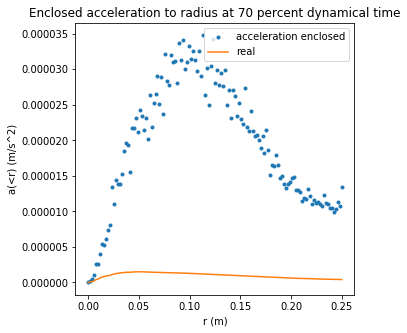

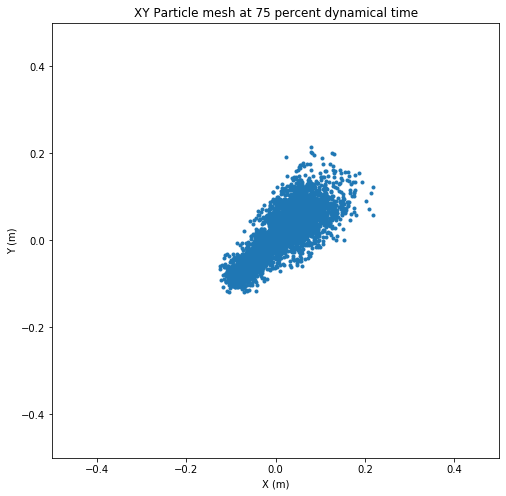

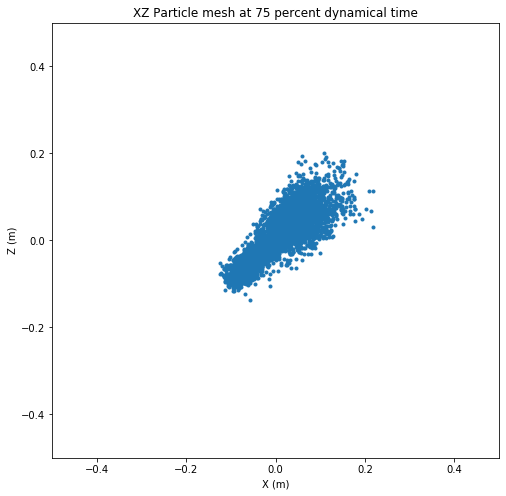

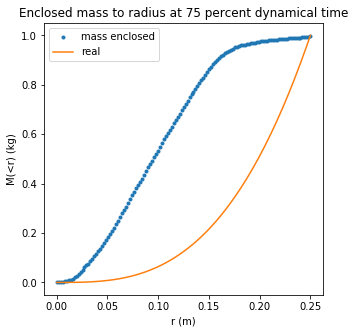

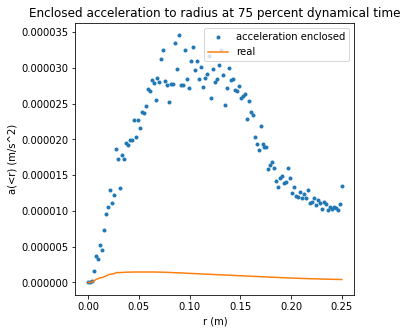

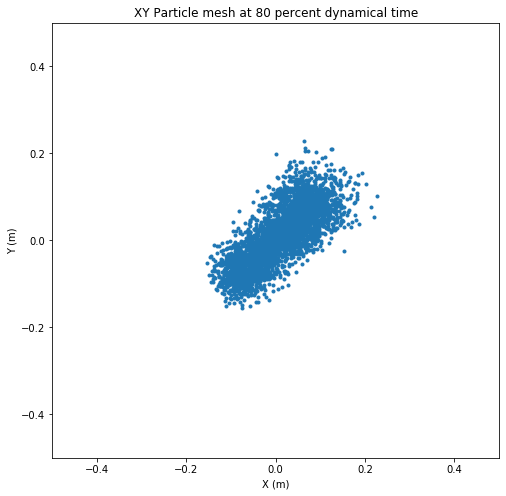

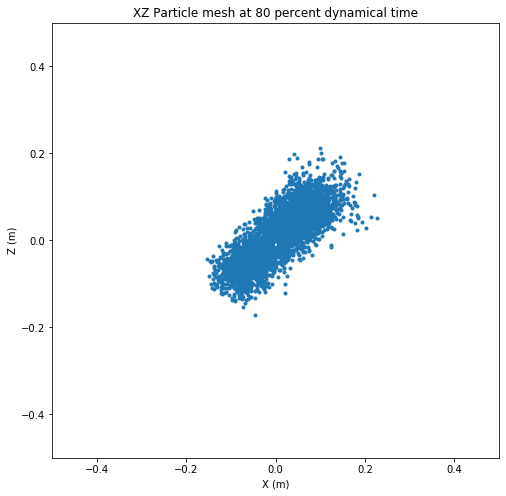

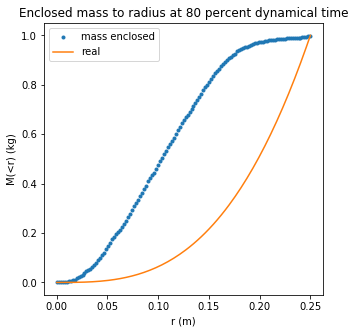

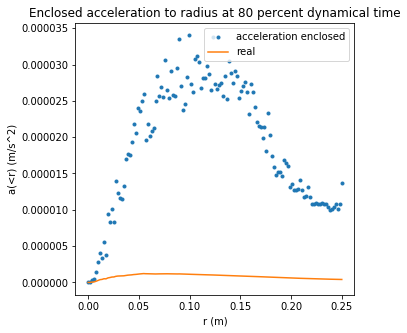

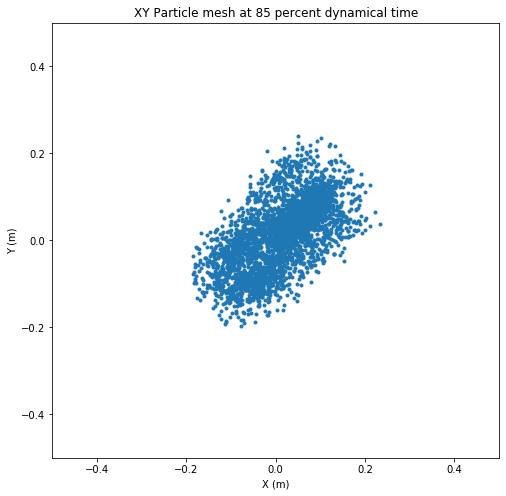

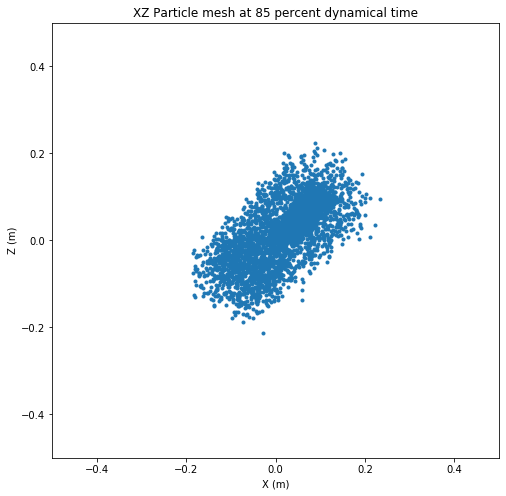

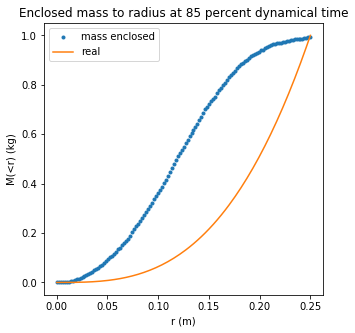

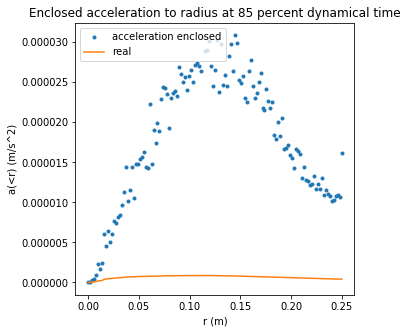

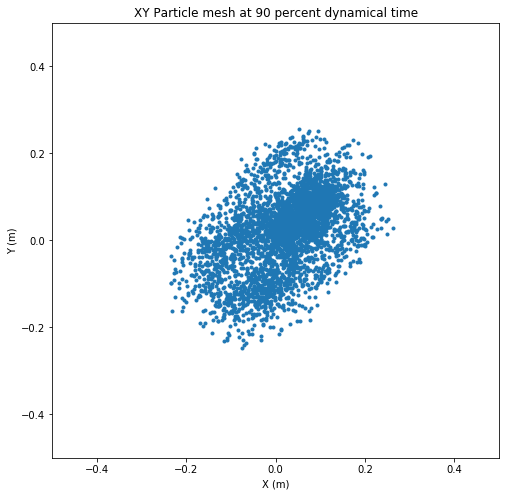

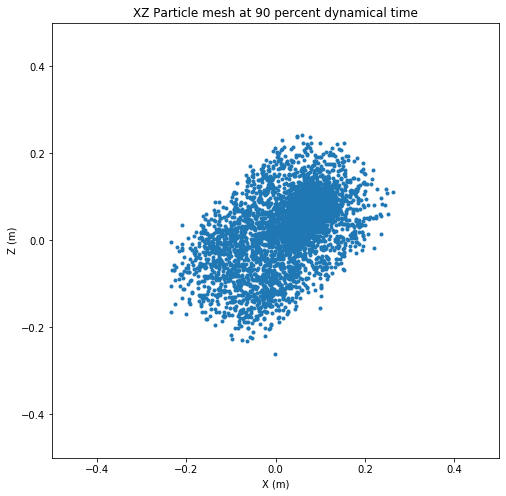

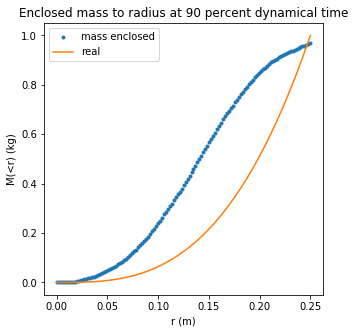

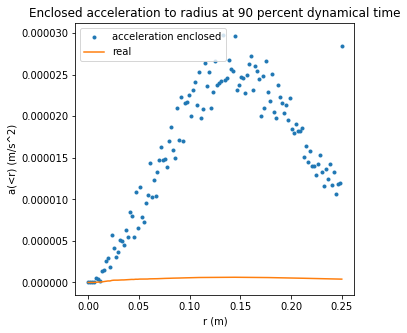

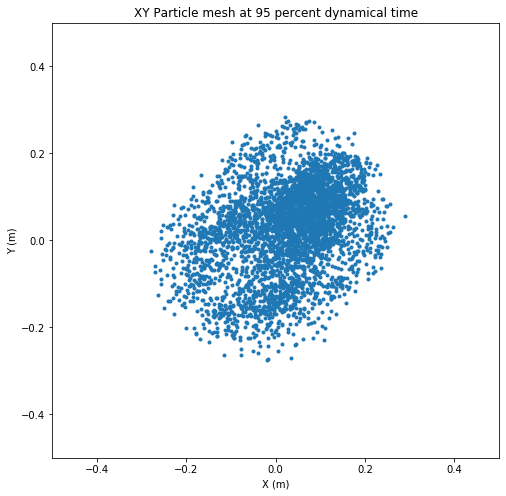

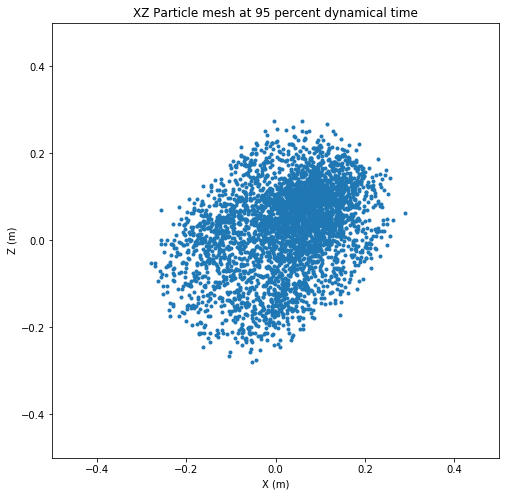

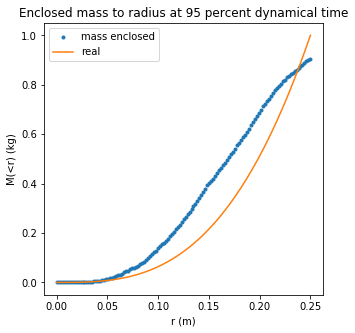

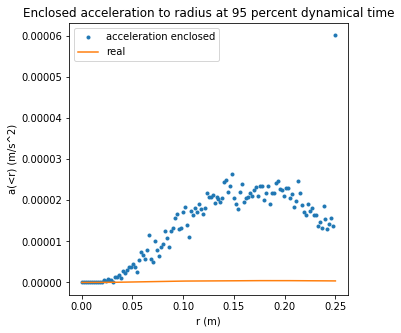

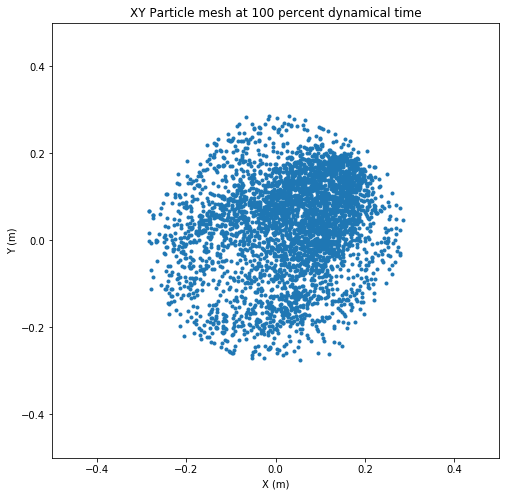

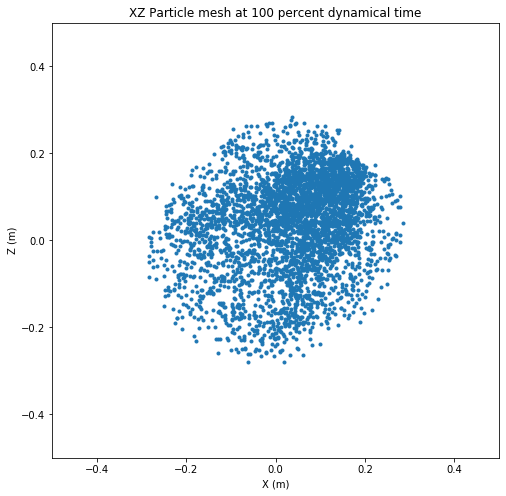

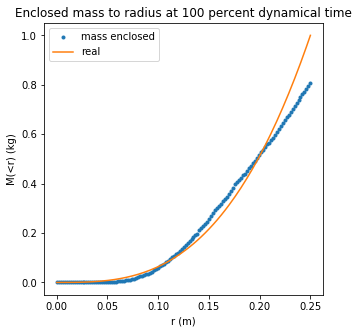

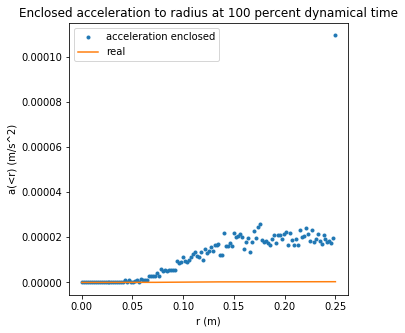

In [314]:
###Initial Conditions
Np = 16**3
Ms = m*Np

#Very similar to the graphs generated in the first cell of the project, just with different random positions
part = np.zeros((Np, 9))
part = particles(part)
part1 = part[0]
part2 = part[1]
part3 = part[2]

#Generate positive velocities for particles
def initvel(part):
    result = copy.deepcopy(part)
    partpos = np.zeros((3, Np))
    
    for i in range(Np):
        # 0 < u < 1
        u = random.rand()
        
        #generate radius from particle
        #print(result)
        x = result[i][0]
        y = result[i][1]
        z = result[i][2]
        r = (x**2 + y**2 + z**2)**(1/2)

        #Choose some conditions
        if (r > 0 and r < .05) or (r > .1 and r < .15) or (r > .2 and r < .25):
            vx = 1/10000*u
            vy = 1/10000*u
            vz = 1/10000*u
        else:
            vx = -1/10000*u
            vy = -1/10000*u
            vz = -1/10000*u
        result[i][3] = vx
        result[i][4] = vy
        result[i][5] = vz

    return result

#Process
partvel = initvel(part1)
rhox = density(part2)/Vc
rhok = np.fft.rfftn(rhox) 
phik = rhok * wk
phix = np.fft.irfftn(phik)
fvector = gradient(phix)
fx2 = force(part2, fvector)*(L/Nc)**(2)

#Generate initial dt; initial velocity should be included into the calculation if needed
def initialdt(f, result):
    gamma = .5
    delta = L/Nc
    resultv = np.zeros(Np)
    resulta = np.zeros(Np)
    for i in range(Np):
        resultv[i] = (result[i][3]**2 + result[i][4]**2 + result[i][5]**2)**(1/2)
        resulta[i] = (f[i][0]**2 + f[i][1]**2 + f[i][2]**2)**(1/2)
    vmax = max(resultv)
    amax = max(resulta)
    print(delta/vmax, sqrt(delta/amax))
    return gamma*min(delta/vmax, sqrt(delta/amax))

dt = initialdt(fx2, partvel)
print(dt)

V2 = verlet(density, wk, gradient, force, fx2, [partvel, part2, []], dt)
#[partvel, part2, []]

plt.show()


# Discussion of Independent project

At time t = 0 sec., the particles again form a randomly generated sphere with approximate radius r = .25 m. 
\
\
At first, the particle mesh began like the N-body problem, showing the particles collapsing into the center of the sphere. The mesh also show slight rings ar different radii, corresponding to the hypothesis stated earlier. They should be forming rings since the inital velocity of particles at 0 < r < .05 m, .1 < r < .15 m, .2 < r < .25 m should be going toward the center of the sphere while the particles everywhere else should be going away from the sphere. What forms the rings are the accelerations; some of the acceleration of the particles are opposite those of the direction of the velocity of the paricles which others have accerations and velocities in the same direction. The mass enclosed to radius graphs showed that the mass enclosed is keeping its shape due to the differing initial velocities. The scaling of the acceleration graphs look vary off, but the shape still shows along with the mass enclosed graphs that the accelerations are higher towards the radius of the sphere.
\
\
As time goes to dynamical time, the ring that is in the middle of the sphere doesn't move too much while all of the other particles are moving toward the center of the sphere. This is where the hypothesis breaks since the mesh doesn't continue like the N-body problem. Instead, the graphs show that the particles form two structure near the middle of the center of the sphere. This is due to the initial velocity of the paricles competing with their own acceleration for one structure, while the other structure is following the original N-body simulation. The collapse is due to the law of gravitation and superposition, and the particles reach their minimum radius at around t = 75% dynamical time.
The particle then spread out and continue similarly to the N-body problem, but many of the particles are still grouped in one of the two structures at the end. The mass enclosed curve also comes back to the original mass enclosed curve due to the fact that the spread out particles mimic the original sphere's shape.